<a href="https://colab.research.google.com/github/arpitawad04/Assignment_on_Binary_Classification/blob/main/Assignment_on_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective:
Binary Classification on the Dataset provided and perform Exploratory Data Analysis,do Feature Selection and preprocessing before trainging a model to classify as either '0; or '1'.

# Importing Required Packages

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

# Check version of packages used

In [13]:
pd.__version__

'1.3.5'

In [15]:
np.__version__

'1.21.6'

In [19]:
sns.__version__

'0.11.2'

#Downloading Training Dataset




In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1omXIjV9G2aEf0ecRlJuF21FXEZJpFPBU' -O training_set.csv


--2022-08-12 14:19:17--  https://docs.google.com/uc?export=download&id=1omXIjV9G2aEf0ecRlJuF21FXEZJpFPBU
Resolving docs.google.com (docs.google.com)... 142.251.2.139, 142.251.2.100, 142.251.2.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qoh9eb2rqdjgnqn7quhnc676flgp7jpt/1660313925000/05503934843219983527/*/1omXIjV9G2aEf0ecRlJuF21FXEZJpFPBU?e=download&uuid=444997fb-c74d-49bd-ac0b-a02e027ae86f [following]
--2022-08-12 14:19:17--  https://doc-10-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qoh9eb2rqdjgnqn7quhnc676flgp7jpt/1660313925000/05503934843219983527/*/1omXIjV9G2aEf0ecRlJuF21FXEZJpFPBU?e=download&uuid=444997fb-c74d-49bd-ac0b-a02e027ae86f
Resolving doc-10-as-docs.googleusercontent.com (doc-10-as-docs.googleusercontent.com)... 74.125.137.132, 2607:f8b0:4023

# Downloading Test Dataset


In [3]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19j2nLhNfxbK5uP_ojFoPrHwwana5zoa_' -O test_set.csv


--2022-08-12 14:22:38--  https://docs.google.com/uc?export=download&id=19j2nLhNfxbK5uP_ojFoPrHwwana5zoa_
Resolving docs.google.com (docs.google.com)... 142.251.2.101, 142.251.2.102, 142.251.2.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lhjiqjfqgplkooasrptgeb8bcedkrtcq/1660314150000/05503934843219983527/*/19j2nLhNfxbK5uP_ojFoPrHwwana5zoa_?e=download&uuid=7e347700-8972-436f-a964-ca378bbf60d8 [following]
--2022-08-12 14:22:39--  https://doc-0c-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lhjiqjfqgplkooasrptgeb8bcedkrtcq/1660314150000/05503934843219983527/*/19j2nLhNfxbK5uP_ojFoPrHwwana5zoa_?e=download&uuid=7e347700-8972-436f-a964-ca378bbf60d8
Resolving doc-0c-as-docs.googleusercontent.com (doc-0c-as-docs.googleusercontent.com)... 74.125.137.132, 2607:f8b0:4023

In [20]:
#Read training dataset
df=pd.read_csv('/content/training_set.csv')

In [21]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [22]:
#Check dimension of df dataframe
df.shape

(3910, 59)

In [23]:
#Checking column names
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'Y'],
      dtype='object')

In [24]:
#Droping index column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [25]:
pd.set_option('display.max_columns', None)

In [26]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [27]:
df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
3905,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,7.31,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,18.18,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,0.12,0.0,0.12,0.0,0.0,0.25,0.0,0.00,0.00,0.0,0.00,0.12,0.25,0.0,0.00,0.12,0.00,0.00,2.19,0.0,0.51,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.64,0.25,0.12,0.0,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,0.00,0.0,0.00,0.0,0.0,0.00,0.0,3.12,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.04,0.00,0.0,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1
3909,0.96,0.0,0.48,0.0,0.0,0.96,0.0,0.00,0.48,0.0,0.48,0.00,0.00,0.0,1.44,0.48,0.48,2.41,0.00,0.0,0.96,0.0,0.0,0.48,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.48,0.0,0.0,0.0,0.818,0.0,0.175,0.467,0.116,9.560,259,717,1


# Exploratory Data Analysis

In [28]:
#Knowing schemas of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

In [29]:
# Find Null values in each variable
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

In [30]:
# Lets Look at summary statistic 
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.00000

#Plotting Predictor Variables

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


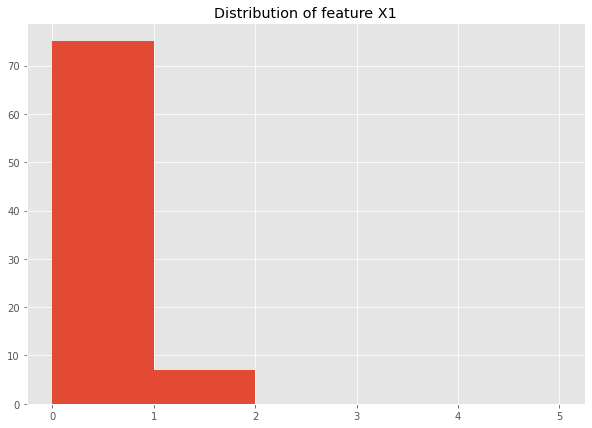

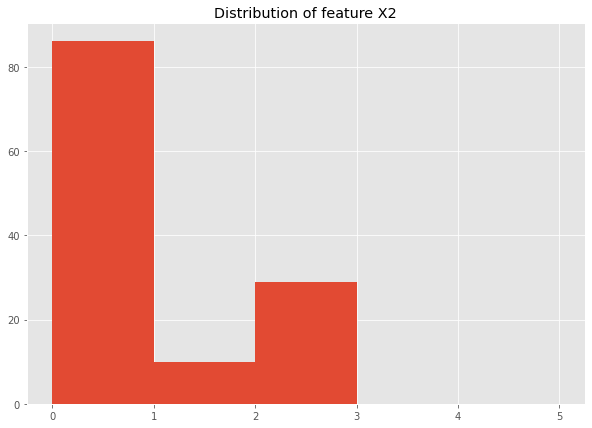

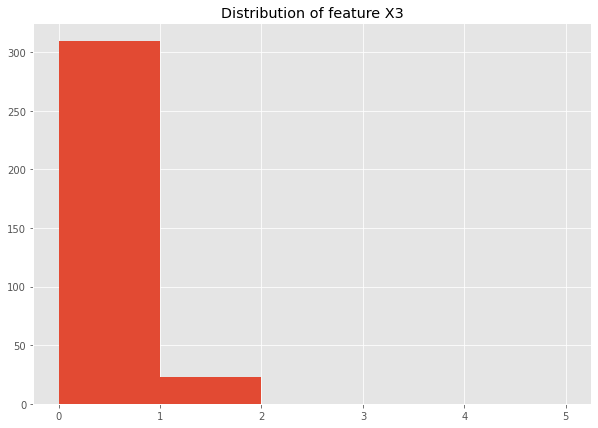

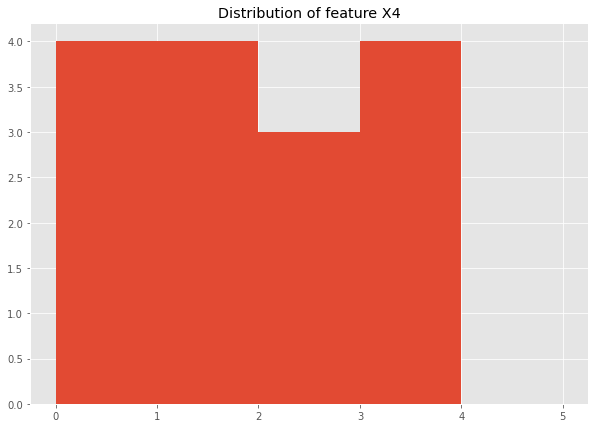

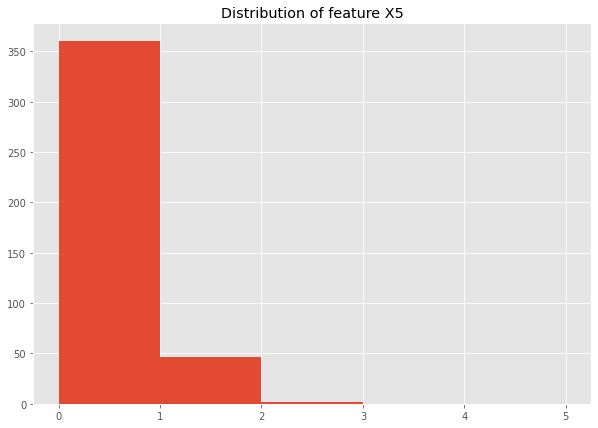

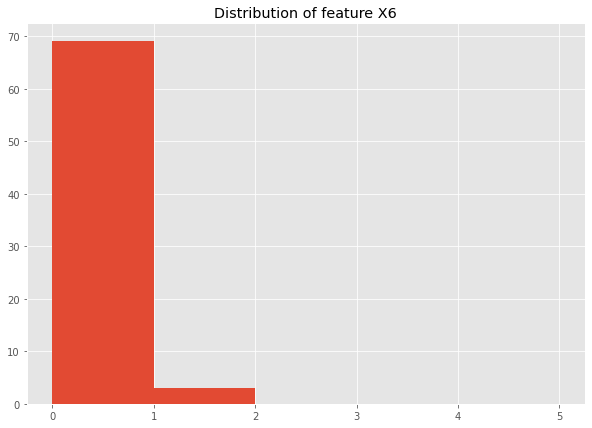

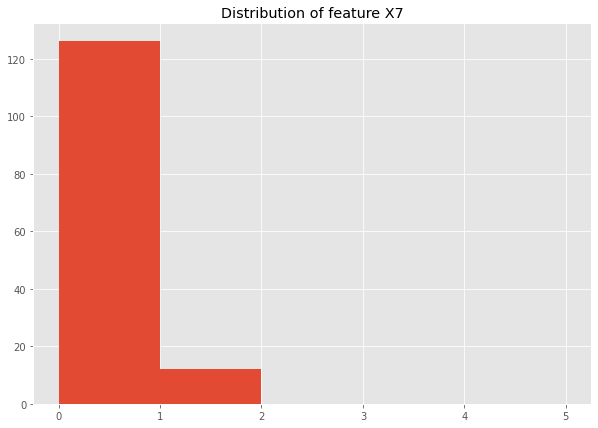

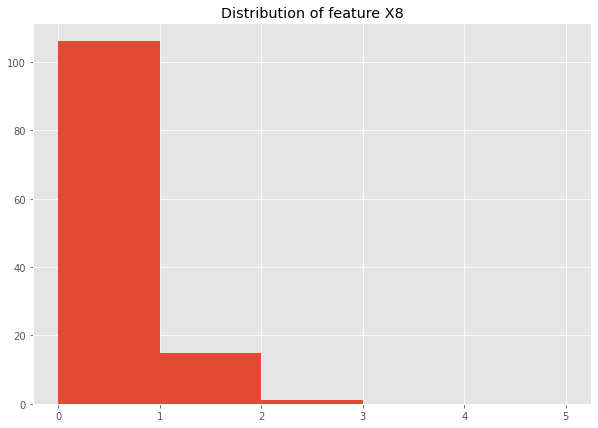

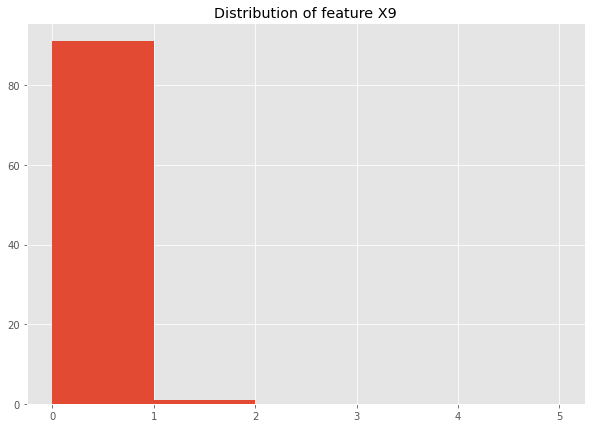

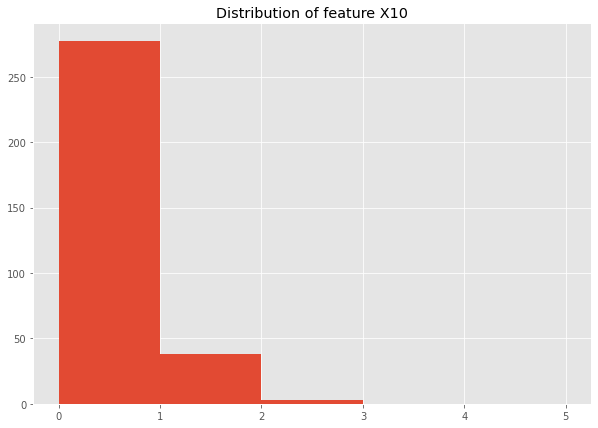

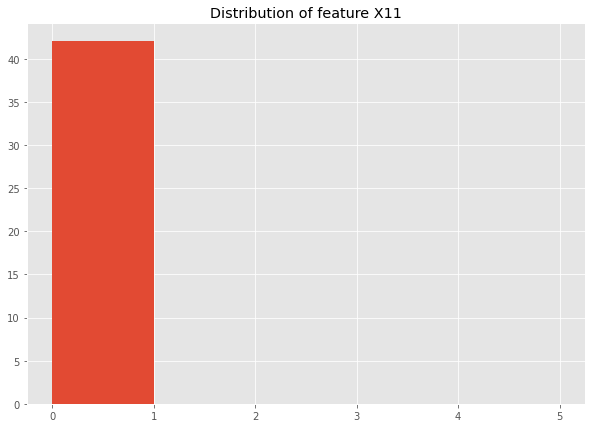

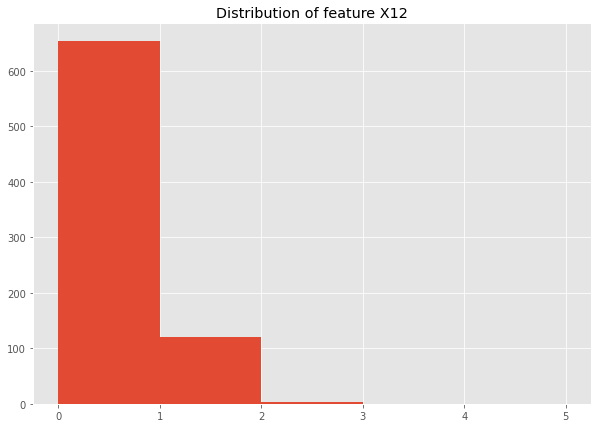

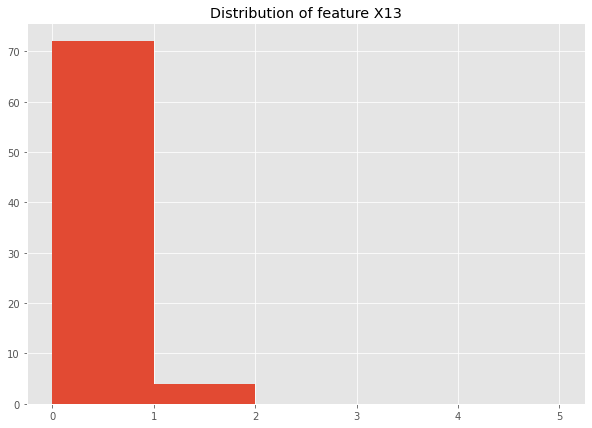

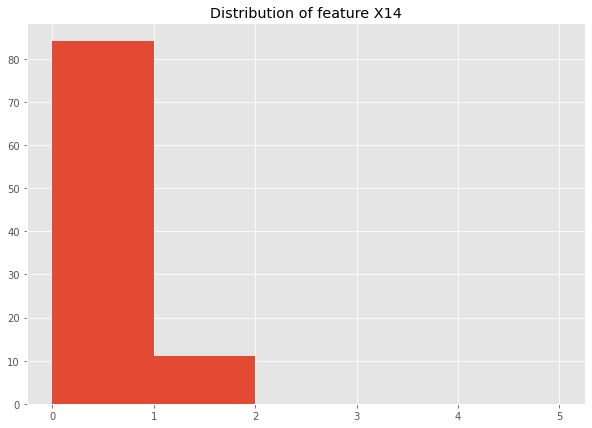

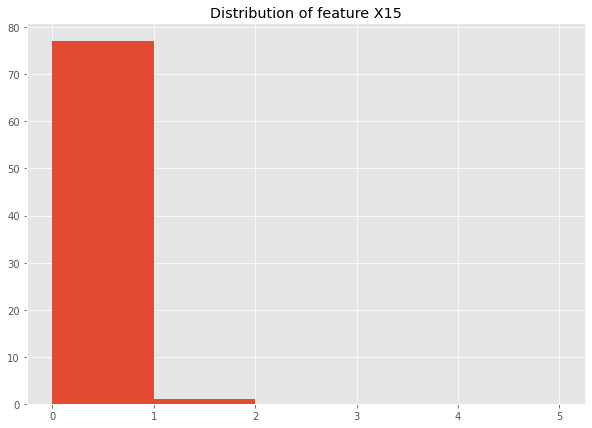

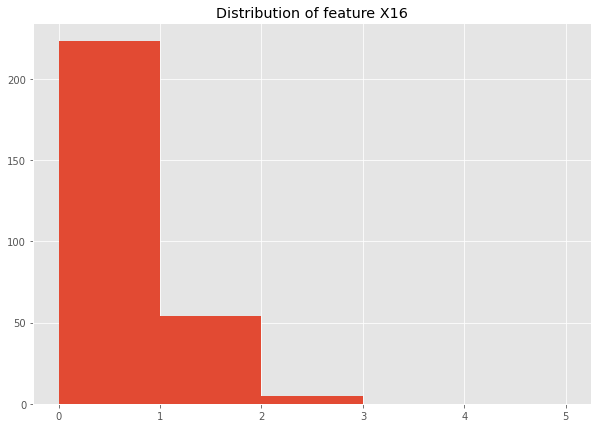

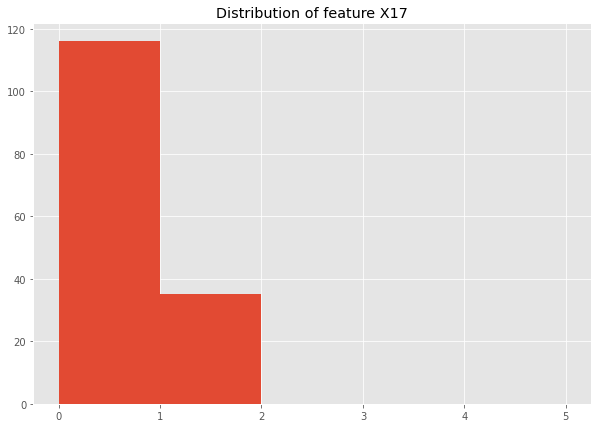

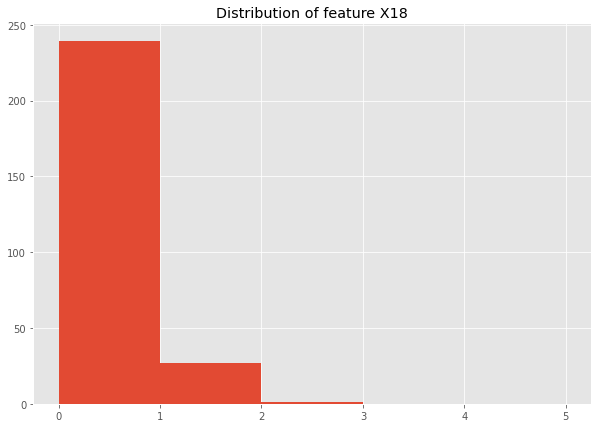

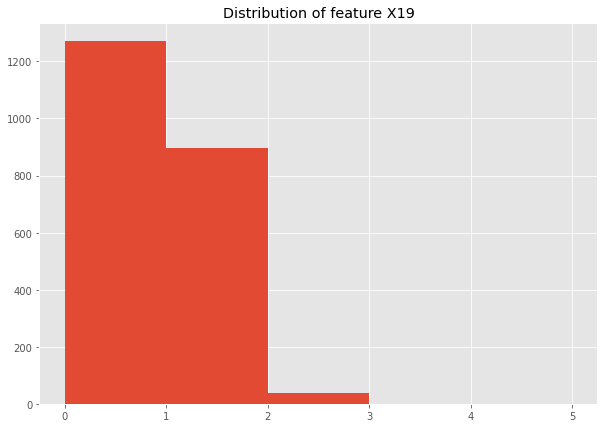

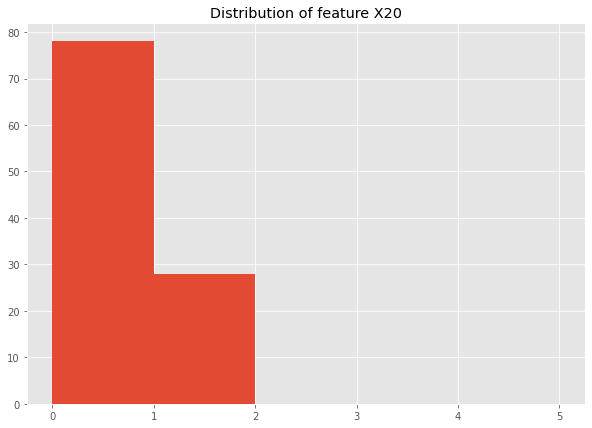

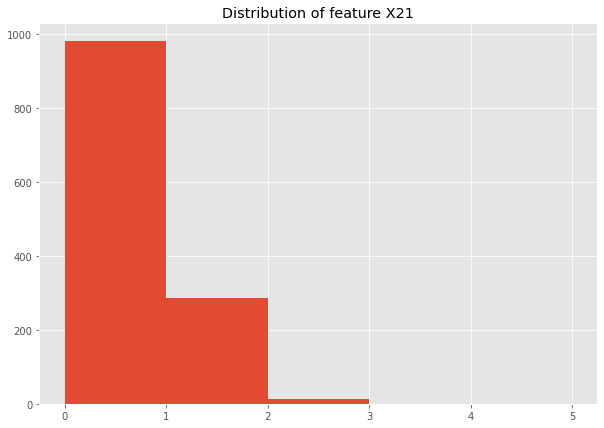

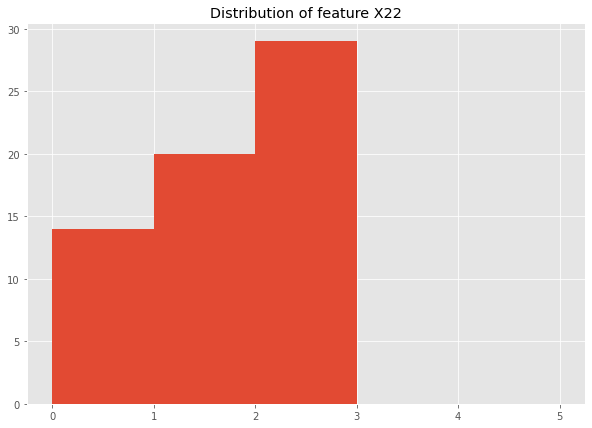

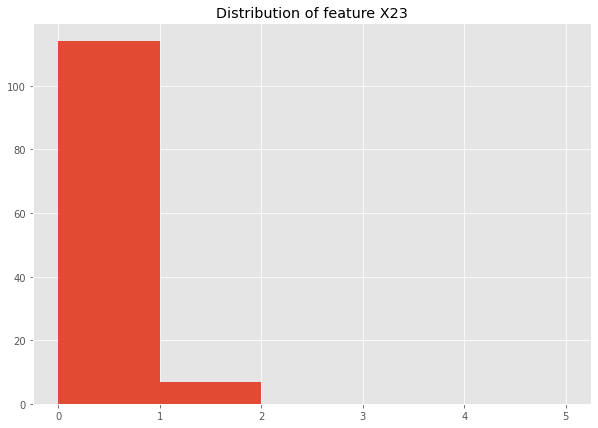

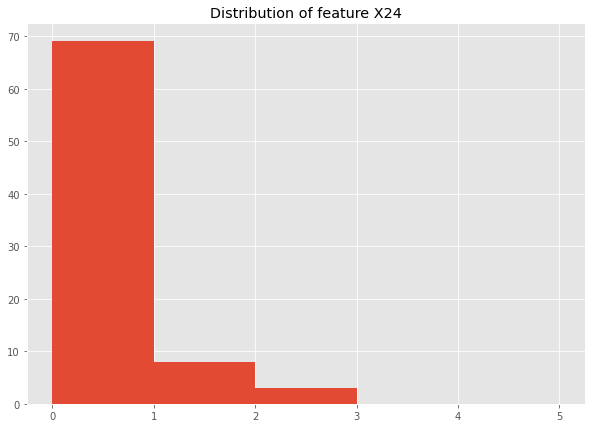

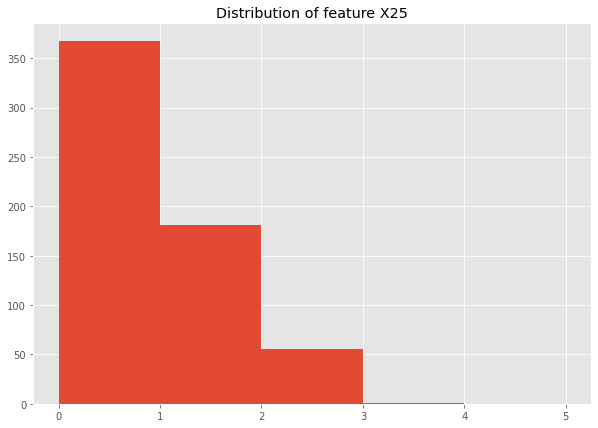

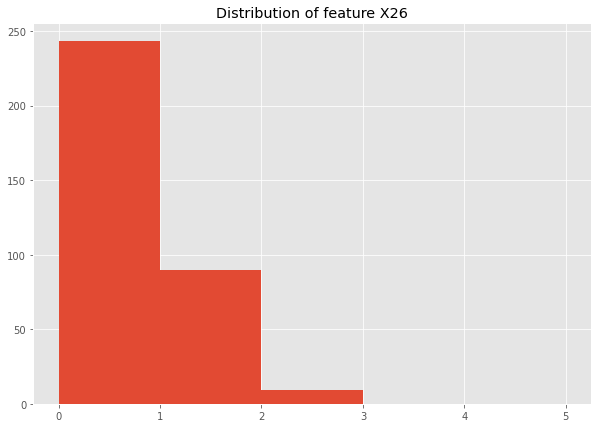

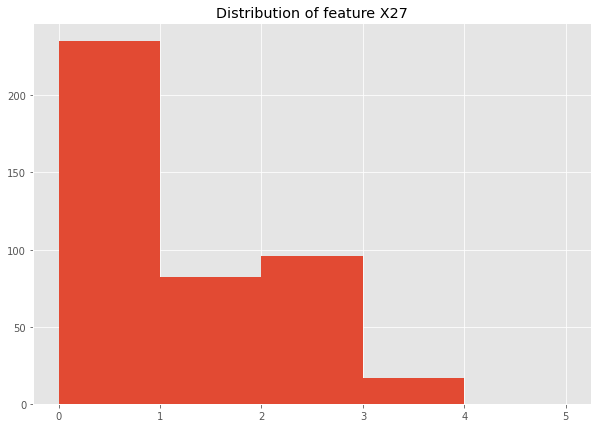

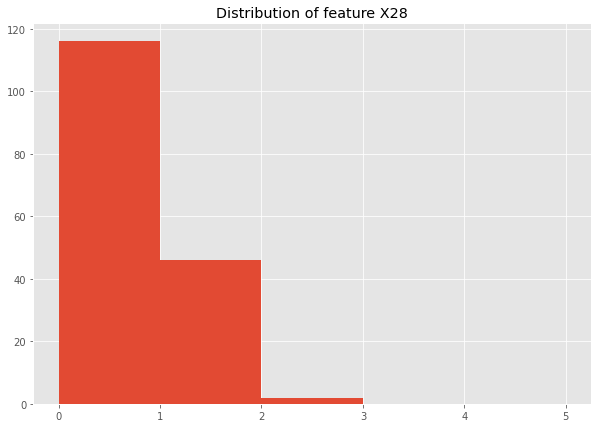

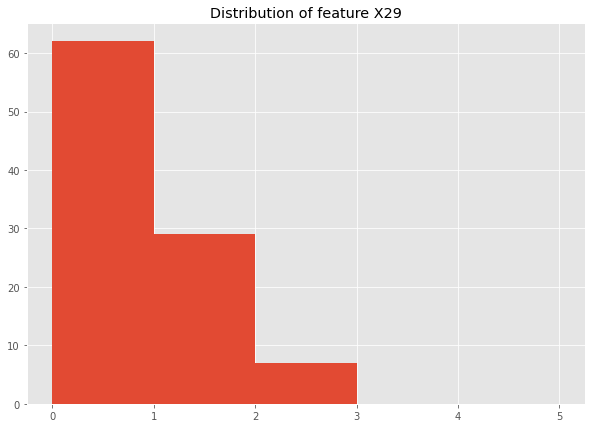

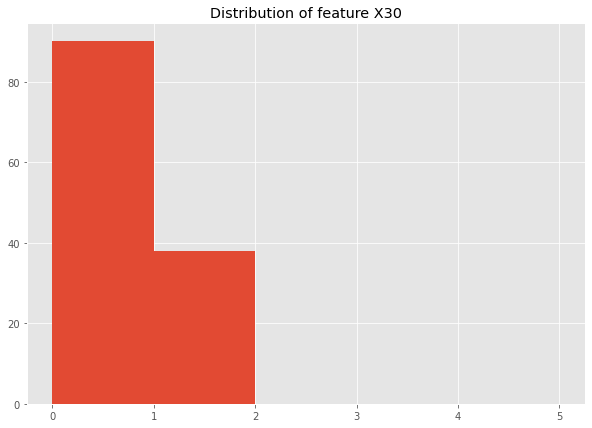

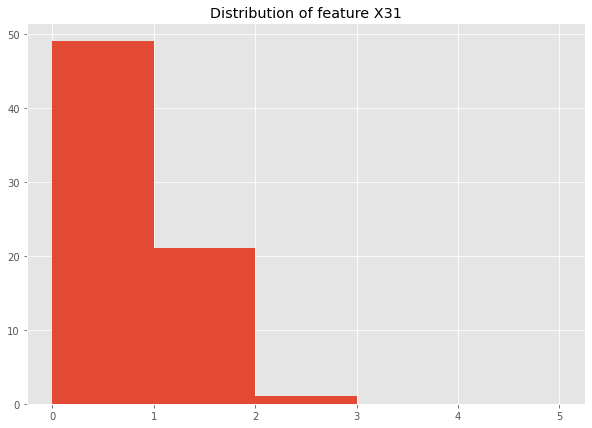

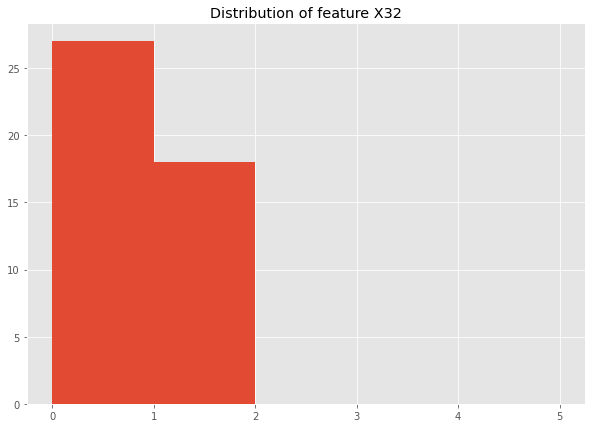

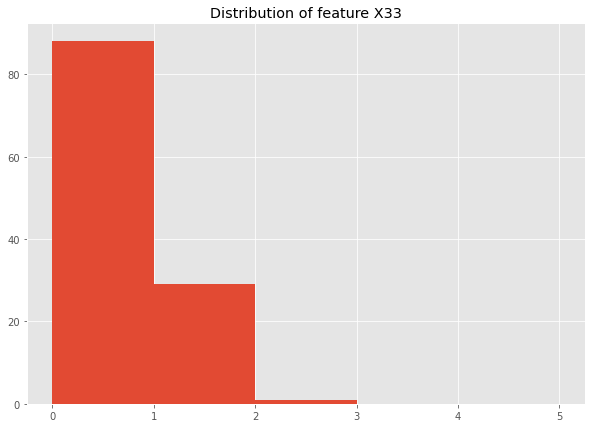

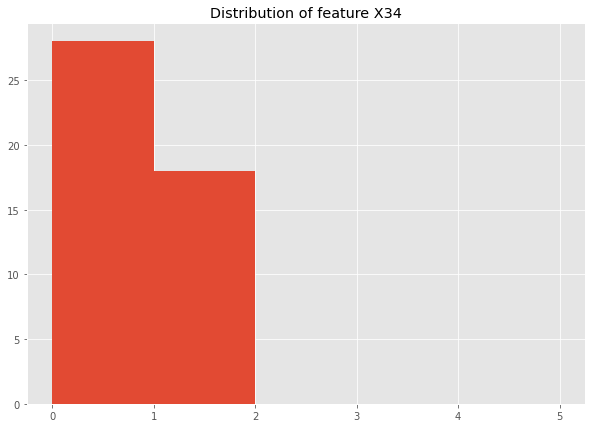

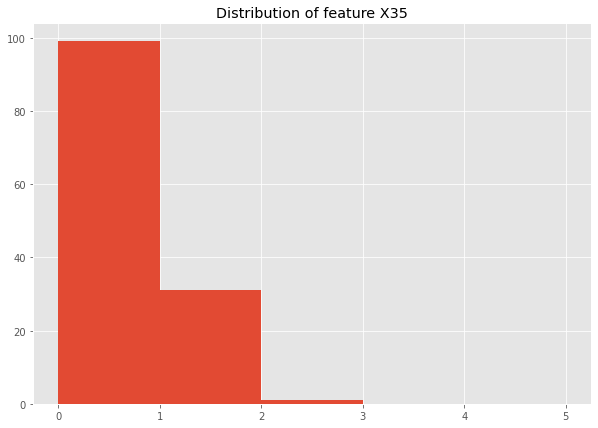

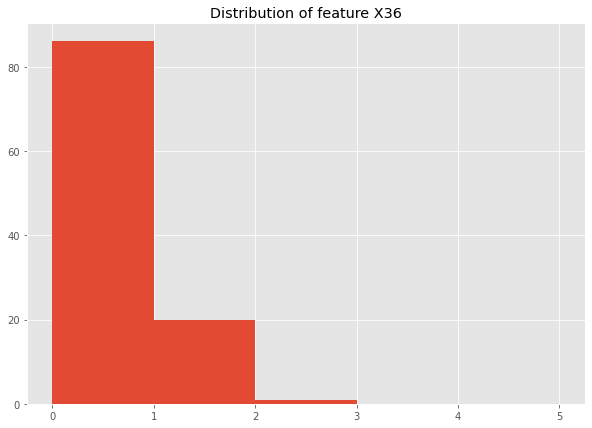

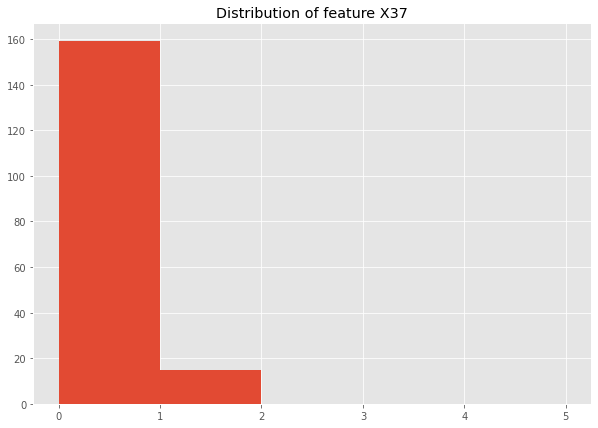

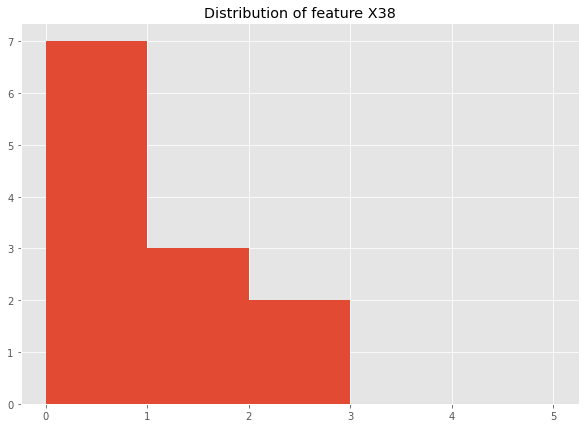

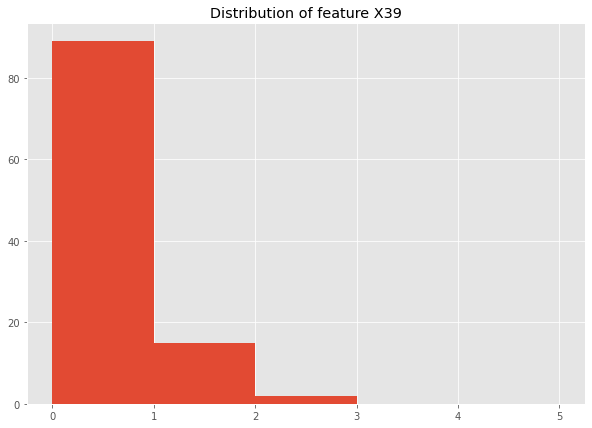

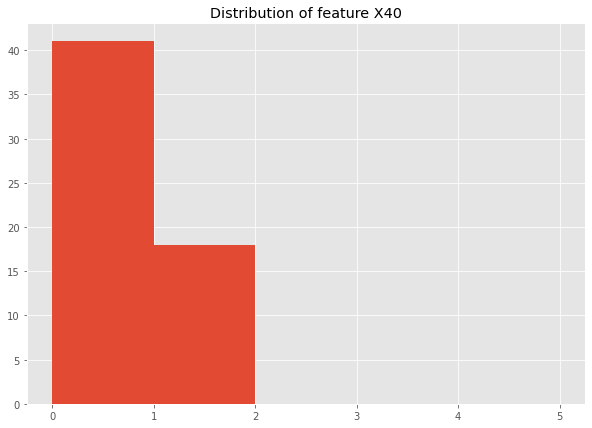

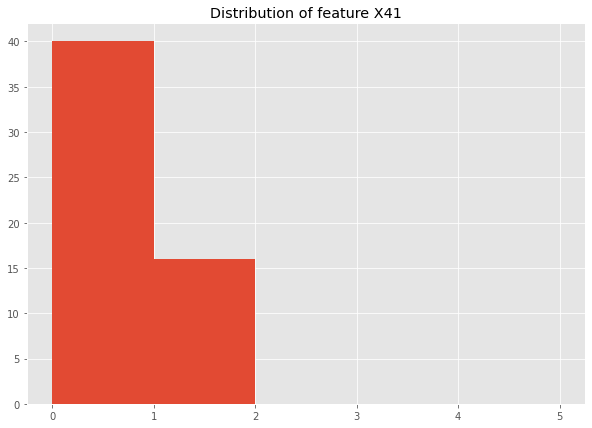

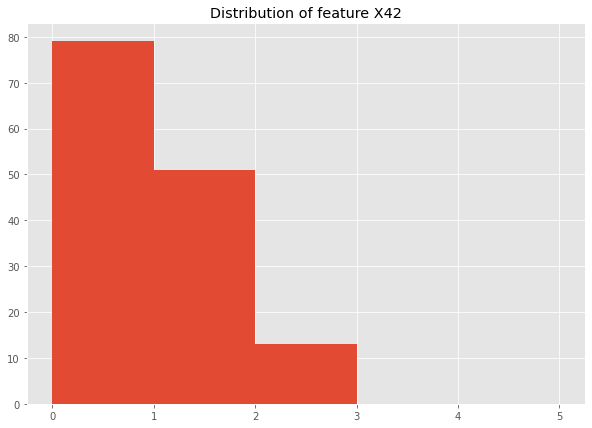

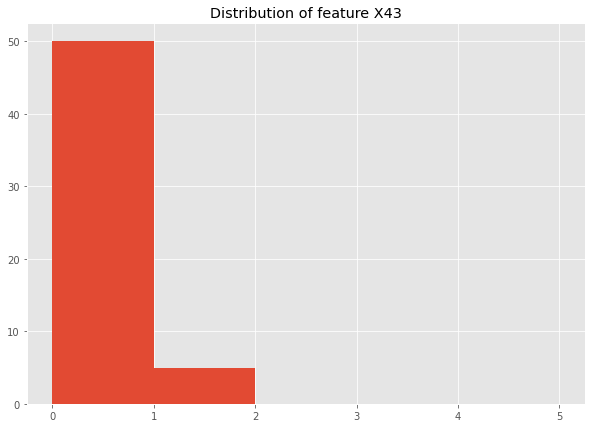

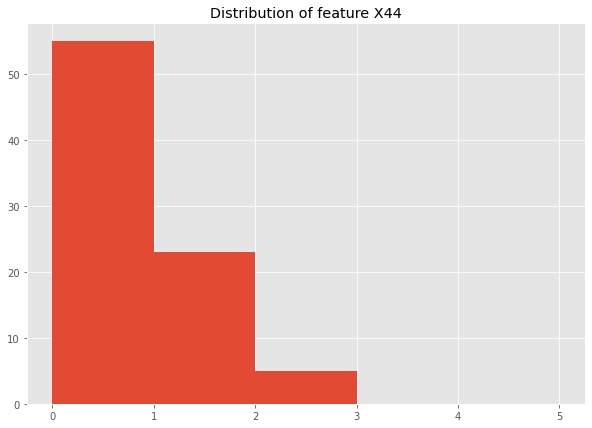

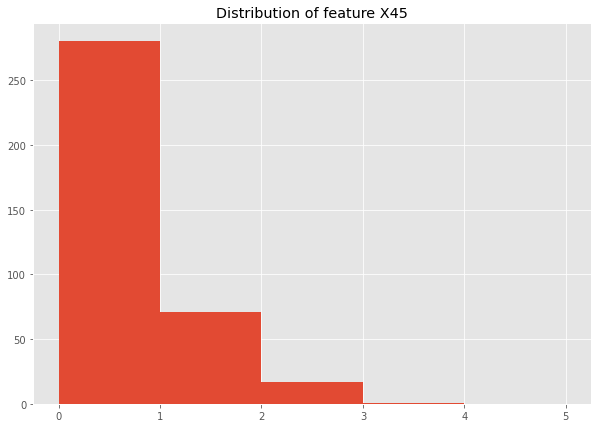

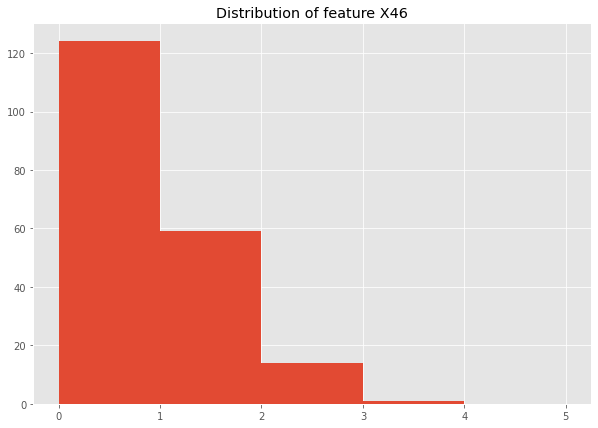

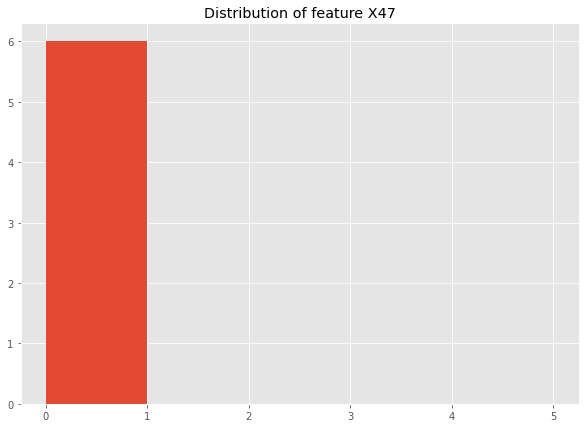

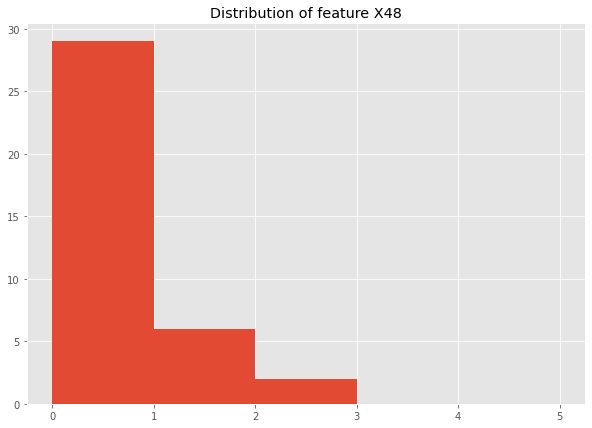

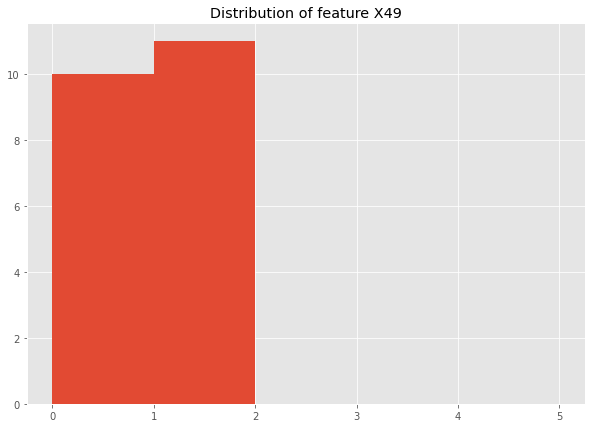

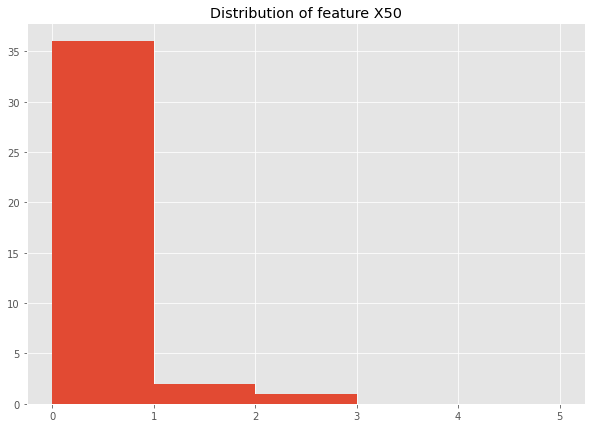

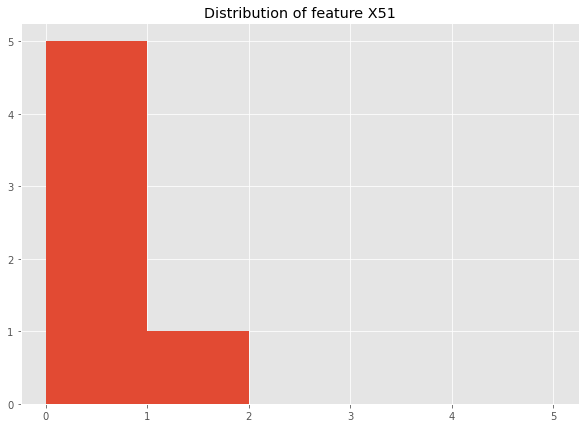

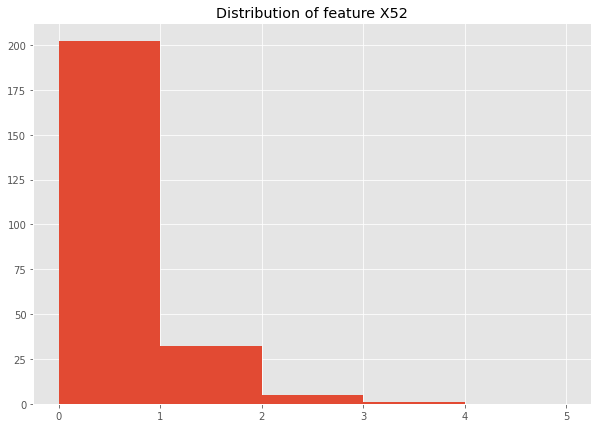

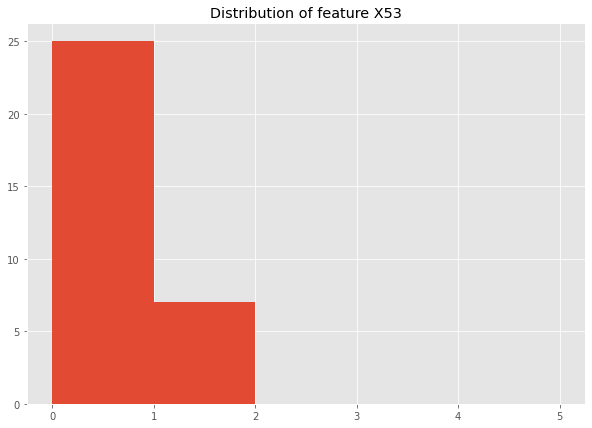

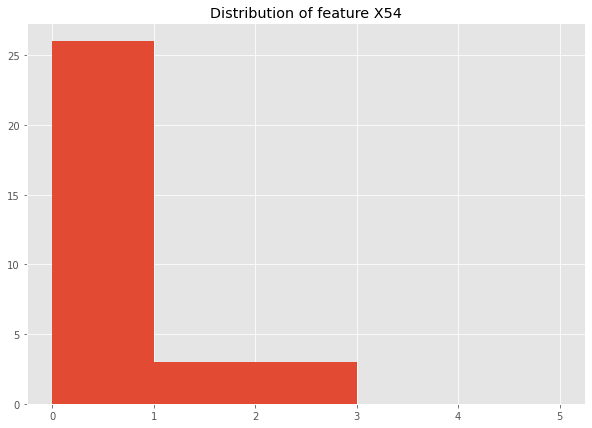

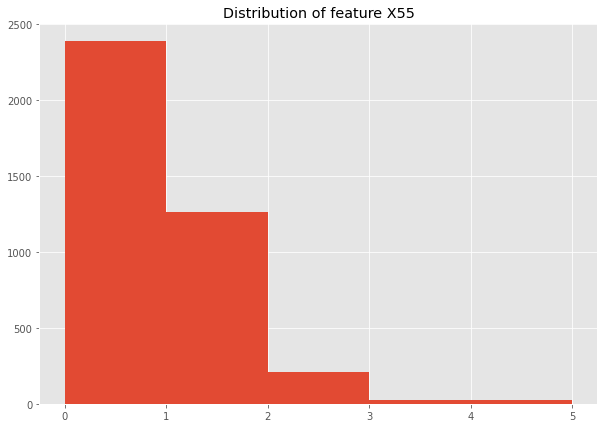

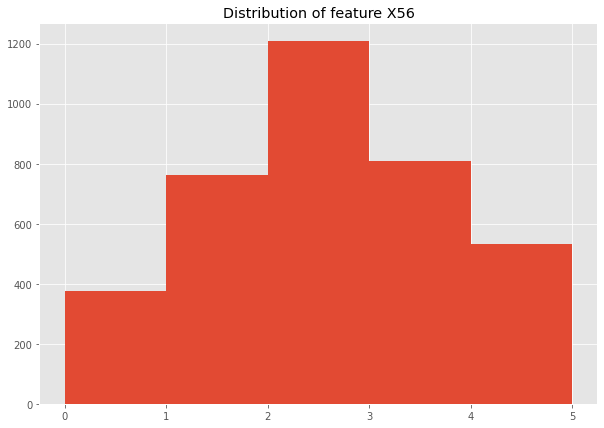

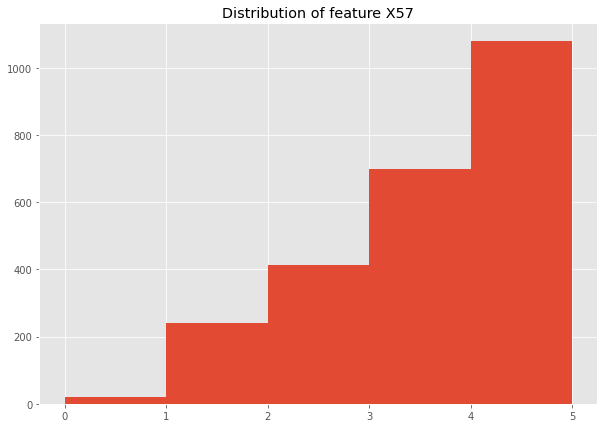

In [13]:
for i in df.columns:
  if i !='Y':
    # Creating histogram
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(np.log(df[i]),bins = [0,1, 2,3,4, 5])
    plt.title('Distribution of feature '+str(i))
    
    # Show plot
    plt.show()

From the summary statistics almost all variables looks to having skewed distribution.


In [31]:
#Outlier detection function
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers



In [32]:
#Outlier detection function applied on all predictor variables
for j in df.columns:
  if j!='Y':
    sample_outliers = detect_outliers_iqr(np.log(df[j]+0.01 ))
    print("Outliers from IQR method for feature  "+str(j),sample_outliers )
    print(len(sample_outliers))

Outliers from IQR method for feature  X1 [-3.912023005428146, -3.912023005428146, -3.912023005428146, -3.912023005428146, -3.506557897319982, -3.506557897319982, -3.506557897319982, -3.2188758248682006, -3.2188758248682006, -2.995732273553991, -2.995732273553991, -2.995732273553991, -2.995732273553991, -2.995732273553991, -2.995732273553991, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.8134107167600364, -2.6592600369327783, -2.6592600369327783, -2.6592600369327783, -2.6592600369327783, -2.6592600369327783, -2.6592600369327783, -2.6592600369327783, -2.6592600369327783, -2.6592600369327783, -2.6592600369327783, -2.6592600369327783, -2.65

As data for lot of variable is skewed and contains outliers,we can not use it directly for our model as it will hamper our model performance.\
For handling skewness ,log transformation is done and as in every feature lot of 0 values are present therefore a small positive value is added to all the features to carry log transformation

In [33]:
#Creating a copy of df dataframe
df2=df.copy()

In [34]:
df2=df2.drop('Y',axis=1)

In [35]:
df2.shape

(3910, 57)

# Log Transformation and Normalisation

In [36]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y
df_normalised_transformed = normalize(np.log(df2 + 0.01))

In [37]:
df_normalised_transformed

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.000000,0.000000,0.992655,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.606818,0.000000,0.000000,0.025827,0.074808,0.268915
1,0.000000,0.556532,0.660597,0.00000,0.693832,0.687531,0.822502,0.000000,0.000000,0.53864,0.000000,0.588060,0.000000,0.000000,0.000000,0.000000,0.000000,0.608308,0.772997,0.0,0.674001,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.527128,0.000000,0.0,0.0,0.0,0.323957,0.0,0.486974,0.000000,0.293700,0.397701,0.542143,0.642693
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888730,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.730397,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.173950
3,0.687103,0.000000,0.682056,0.00000,0.773156,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.707981,0.000000,0.000000,0.000000,0.640347,0.635150,0.000000,0.698943,0.0,0.792258,0.0,0.662326,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.476673,0.568453,0.000000,0.126674,0.334977,0.520732
4,0.671161,0.000000,0.000000,0.97748,0.598455,0.000000,0.618718,0.581350,0.000000,0.00000,0.000000,0.000000,0.000000,0.645102,0.000000,0.536419,0.620414,0.613497,0.541010,0.0,0.736363,0.0,0.000000,0.667748,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.397582,0.502394,0.000000,0.171315,0.522031,0.578154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.875132,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.076436,0.149886,0.268915
3906,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.982203,0.918405,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.098377,0.118704,0.149767
3907,0.422190,0.000000,0.419089,0.00000,0.000000,0.554048,0.000000,0.000000,0.000000,0.00000,0.000000,0.373071,0.515459,0.000000,0.000000,0.337431,0.000000,0.000000,0.715630,0.0,0.563344,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.495733,0.0,0.0,0.54916,0.424787,0.333156,0.0,0.0,0.0,0.338794,0.0,0.147652,0.000000,0.000000,0.031275,0.174088,0.528462
3908,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.819258,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0

In [38]:
df.iloc[:,:-1]=df_normalised_transformed

In [39]:
df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
3905,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.875132,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.076436,0.149886,0.268915,0
3906,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.982203,0.918405,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.098377,0.118704,0.149767,0
3907,0.422190,0.0,0.419089,0.0,0.0,0.554048,0.0,0.000000,0.000000,0.0,0.000000,0.373071,0.515459,0.0,0.000000,0.337431,0.000000,0.000000,0.715630,0.0,0.563344,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.495733,0.0,0.0,0.54916,0.424787,0.333156,0.0,0.0,0.0,0.338794,0.0,0.147652,0.000000,0.000000,0.031275,0.174088,0.528462,0
3908,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.819258,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.606777,0.000000,0.0,0.0,0.0,0.440892,0.0,0.375332,0.474279,0.000000,0.191916,0.348867,0.476249,1
3909,0.752996,0.0,0.635887,0.0,0.0,0.777942,0.0,0.000000,0.673239,0.0,0.698919,0.000000,0.000000,0.0,0.817022,0.511987,0.592157,0.825852,0.000000,0.0,0.652234,0.0,0.0,0.545707,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.518492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.505501,0.0,0.0,0.0,0.641581,0.0,0.360840,0.603981,0.333696,0.321452,0.602972,0.713093,1


# Get Count of Categories in Target Variable 'Y'

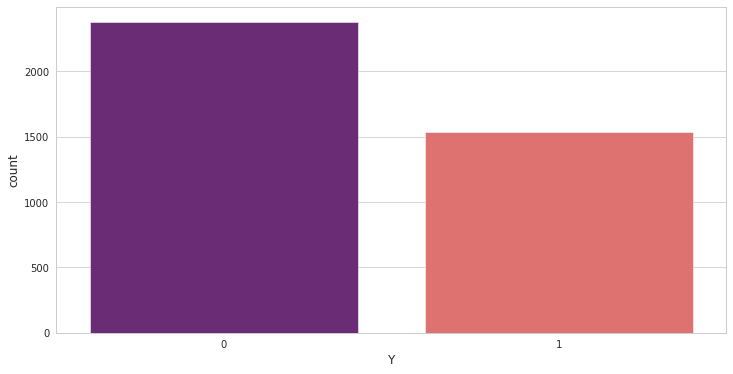

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x="Y", data=df, palette='magma');

# Correlation between Target 'Y' And Predictors (X1,X2,X3....)

In [41]:
 for i in df.columns:
    if i !='Y':
      print("Correlation coeff between Y and "+str(i),df[i]. corr(df['Y']))

 

Correlation coeff between Y and X1 0.2437513906219962
Correlation coeff between Y and X2 0.2698485666059449
Correlation coeff between Y and X3 0.3456707337525503
Correlation coeff between Y and X4 0.09505076078591937
Correlation coeff between Y and X5 0.40272379042936
Correlation coeff between Y and X6 0.33120043380371084
Correlation coeff between Y and X7 0.5006023465293536
Correlation coeff between Y and X8 0.35440419711074683
Correlation coeff between Y and X9 0.31033946919948885
Correlation coeff between Y and X10 0.2977360365268149
Correlation coeff between Y and X11 0.3588487228258289
Correlation coeff between Y and X12 0.1750825669390737
Correlation coeff between Y and X13 0.2135038109824609
Correlation coeff between Y and X14 0.1551472700814419
Correlation coeff between Y and X15 0.25741677466334045
Correlation coeff between Y and X16 0.500344567685262
Correlation coeff between Y and X17 0.3652798311678723
Correlation coeff between Y and X18 0.294058644208057
Correlation coeff 

As there are many features ,there may be a chance variables are having multi collinearity.That would be ruining the performance capabilities of our model.
So find a nd remove any one of the Multi collinear variable.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
 # the independent variables set
X = df
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


   feature        VIF
0       X1   1.771443
1       X2   1.695524
2       X3   2.501392
3       X4   1.054832
4       X5   2.307122
5       X6   1.808073
6       X7   1.770476
7       X8   1.737432
8       X9   1.944695
9      X10   1.959905
10     X11   1.744858
11     X12   2.892315
12     X13   1.667228
13     X14   1.334684
14     X15   1.610891
15     X16   2.008054
16     X17   1.877556
17     X18   1.801683
18     X19   5.193516
19     X20   1.530083
20     X21   3.969611
21     X22   1.481454
22     X23   2.074200
23     X24   2.044631
24     X25   4.042989
25     X26   3.339441
26     X27   1.627613
27     X28   3.197534
28     X29   2.225444
29     X30   2.499137
30     X31   3.317709
31     X32  21.318396
32     X33   1.298985
33     X34  19.505573
34     X35   3.171087
35     X36   2.255659
36     X37   1.922096
37     X38   1.061727
38     X39   1.387735
39     X40   2.519525
40     X41   1.319831
41     X42   1.257345
42     X43   1.814924
43     X44   1.153988
44     X45

Checking after remove few variables having greater than 10 VIF score,are we getting VIF score for all variables less than 10.
VIF score less than 10 indicates no  multi-collinearity is present 

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
 # the independent variables set
X = df_normalised_transformed.drop(['X32','X56','X57'],axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns)) ]
  
print(vif_data)

   feature       VIF
0       X1  1.755389
1       X2  1.669718
2       X3  2.466826
3       X4  1.049162
4       X5  2.236356
5       X6  1.787460
6       X7  1.672358
7       X8  1.706391
8       X9  1.932534
9      X10  1.955411
10     X11  1.741382
11     X12  2.753356
12     X13  1.628462
13     X14  1.326188
14     X15  1.595048
15     X16  1.922043
16     X17  1.859657
17     X18  1.785099
18     X19  4.688635
19     X20  1.524556
20     X21  3.893457
21     X22  1.454061
22     X23  2.057548
23     X24  1.989662
24     X25  3.741053
25     X26  3.337951
26     X27  1.466694
27     X28  3.183048
28     X29  2.184598
29     X30  2.490959
30     X31  3.270286
31     X33  1.256931
32     X34  3.796886
33     X35  3.147205
34     X36  2.199375
35     X37  1.874860
36     X38  1.059245
37     X39  1.384724
38     X40  2.478978
39     X41  1.318282
40     X42  1.241656
41     X43  1.800175
42     X44  1.132087
43     X45  1.563219
44     X46  1.508919
45     X47  1.057830
46     X48  1

In [44]:
#As from VIF analysis we can see that VIF score for feature X32,X56,X57 was greater than 10 therefore those feature was correlated with other predictor variables.SO dropping them from the dataset would eliminate chances of multicollinearity and our model will perform better .
df.drop(['X32','X56','X57'],axis=1,inplace=True)

#Plotting Box-Plot

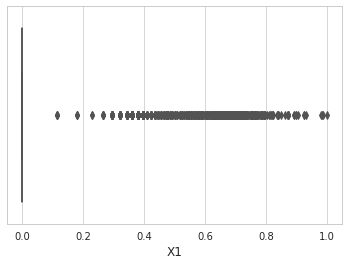

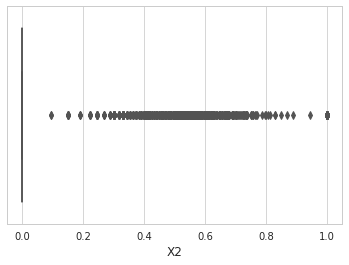

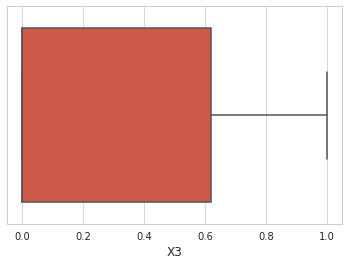

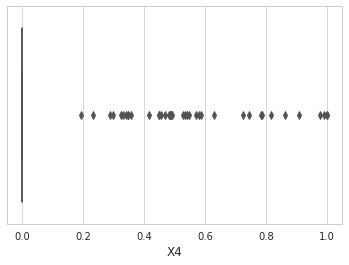

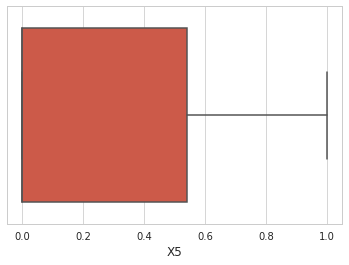

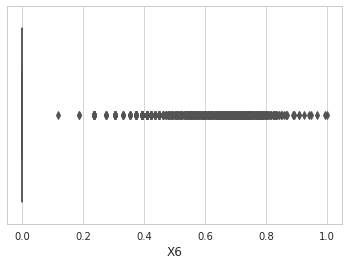

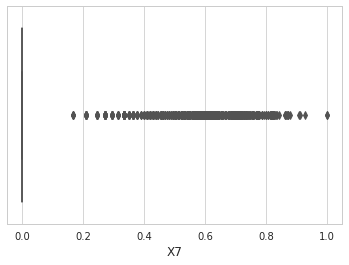

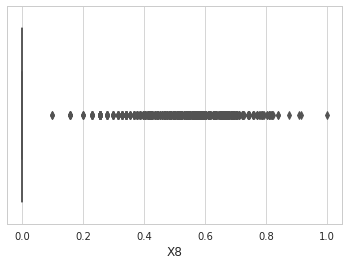

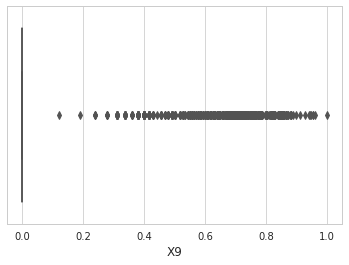

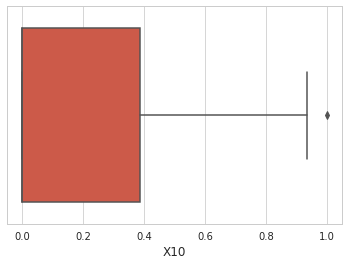

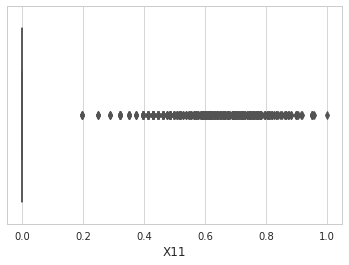

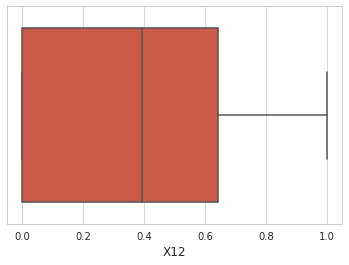

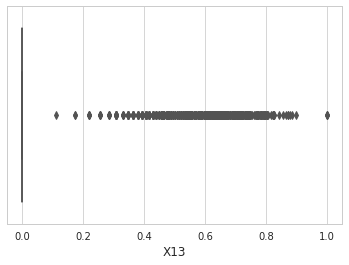

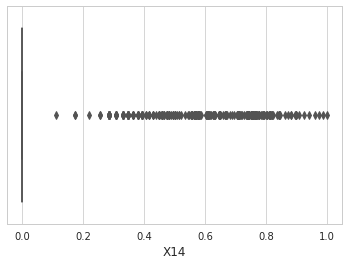

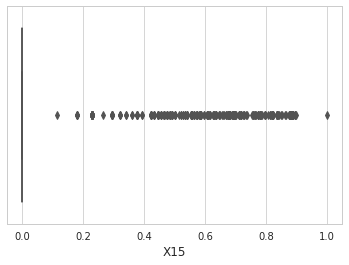

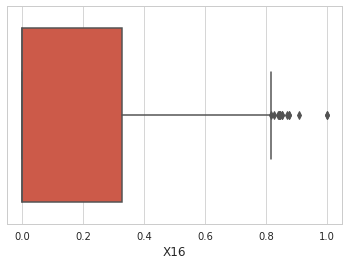

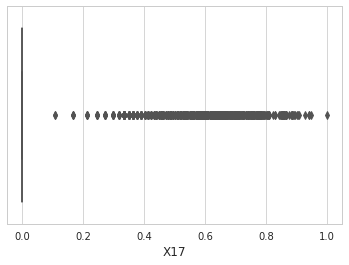

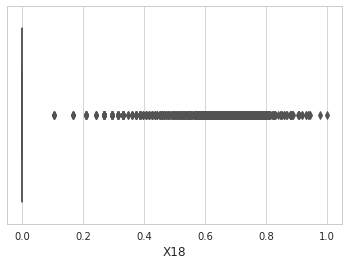

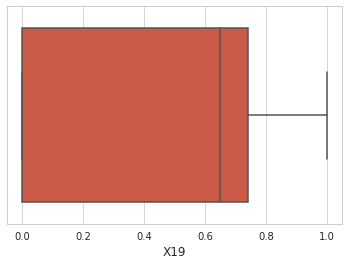

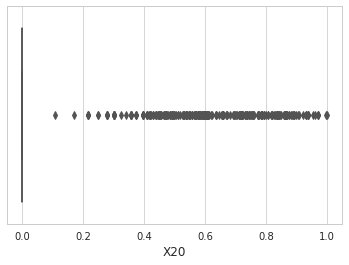

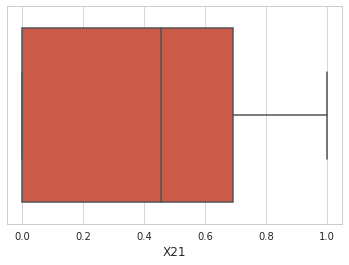

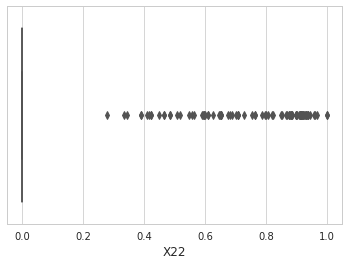

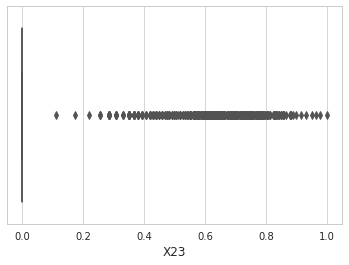

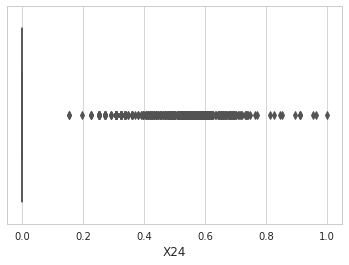

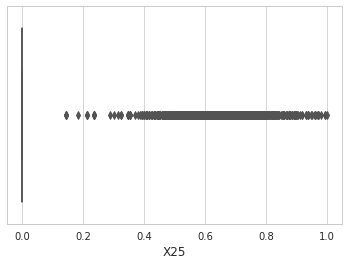

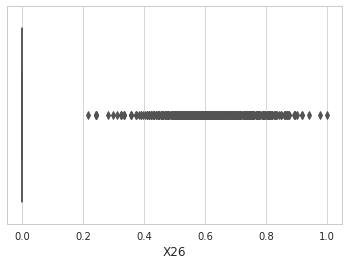

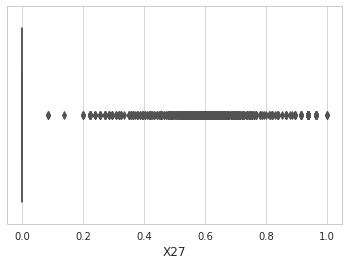

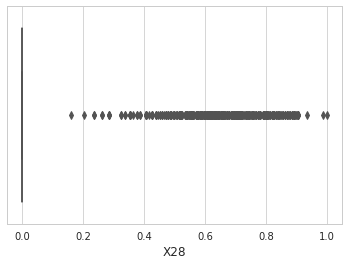

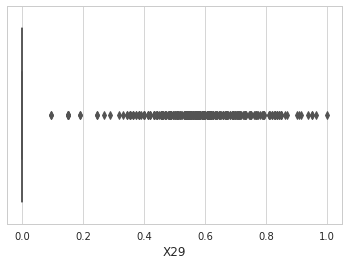

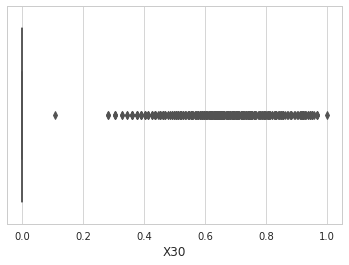

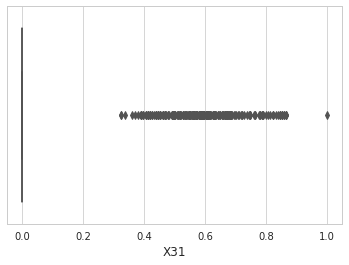

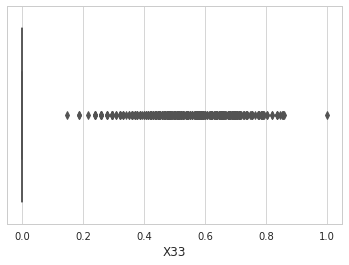

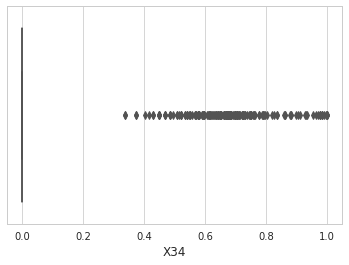

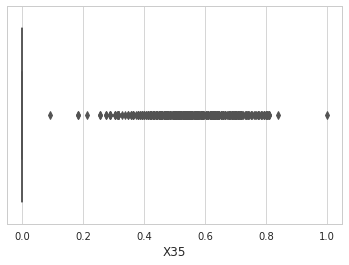

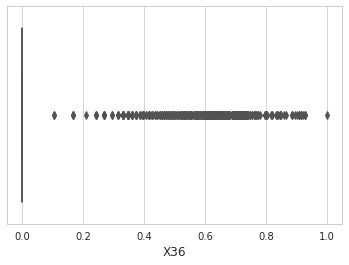

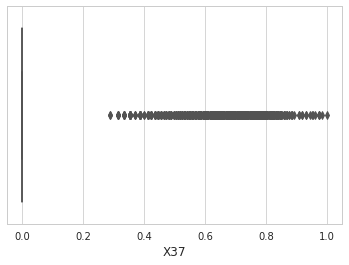

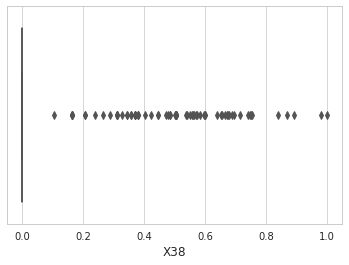

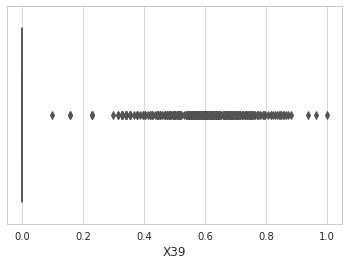

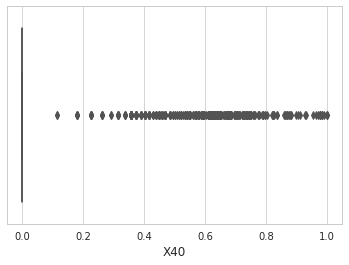

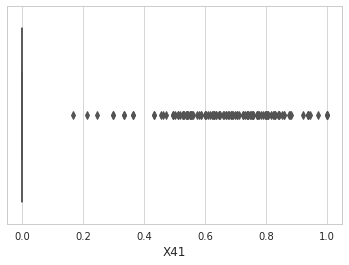

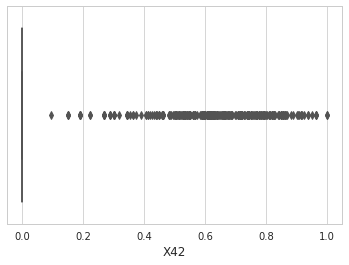

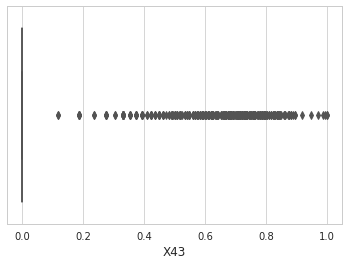

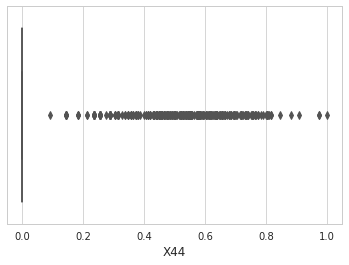

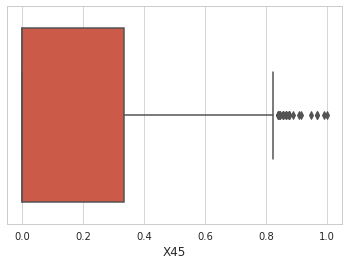

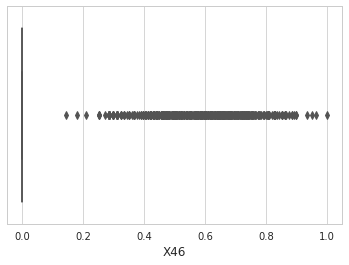

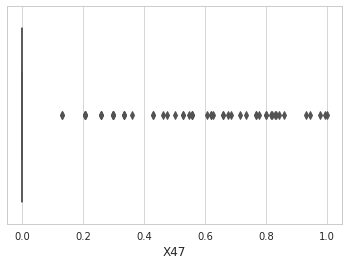

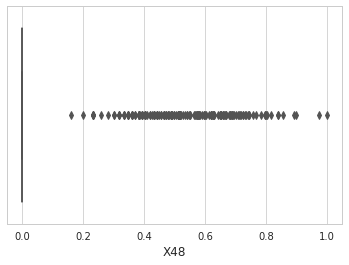

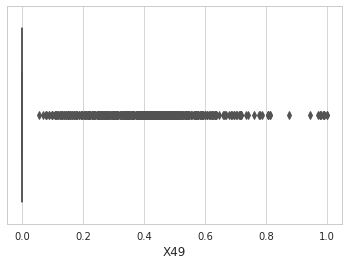

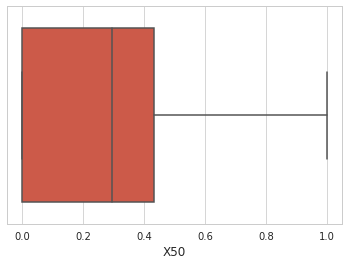

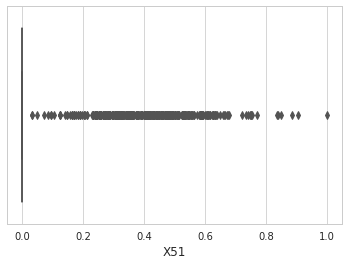

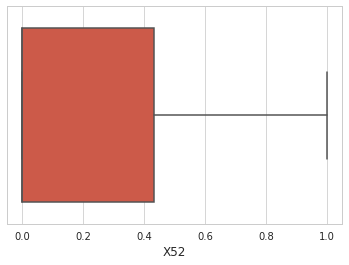

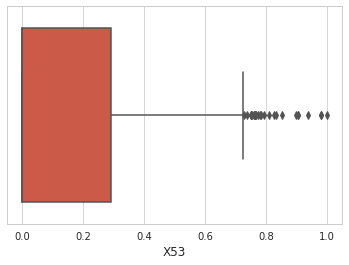

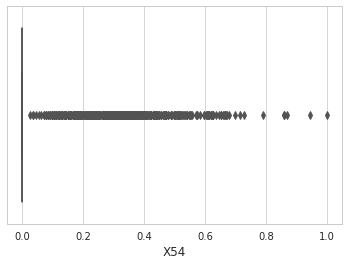

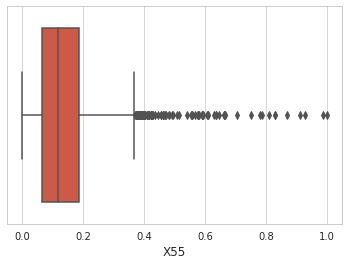

In [45]:
for i in df.columns:
  if i !='Y':
    sns.boxplot(x =df[i])
    plt.show()


# Plotting Frequency -Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


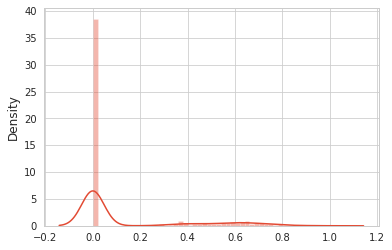

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


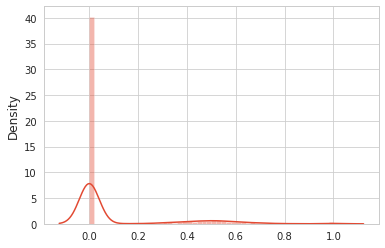

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


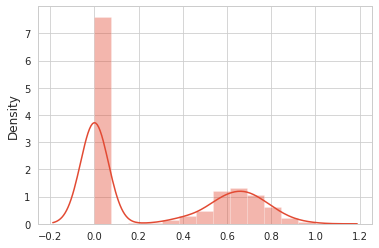

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


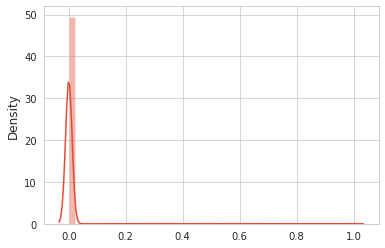

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


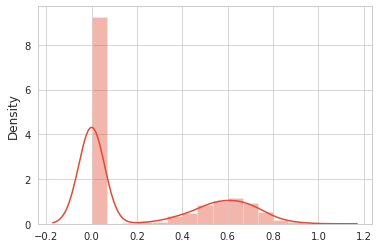

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


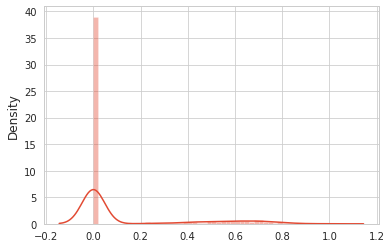

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


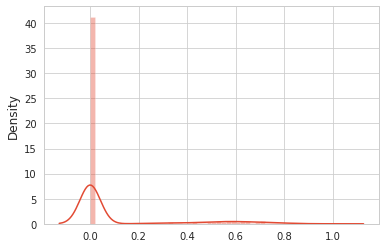

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


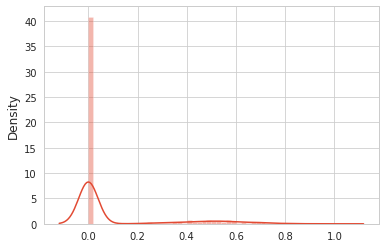

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


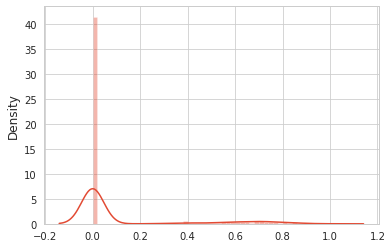

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


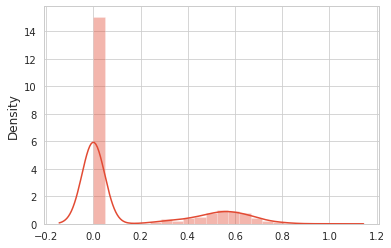

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


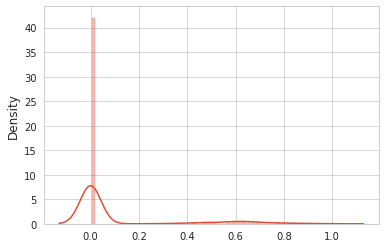

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


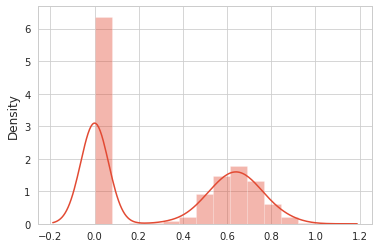

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


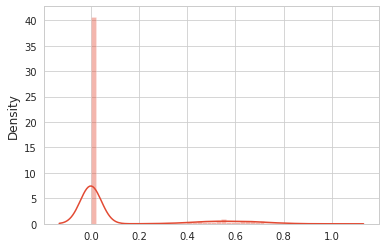

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


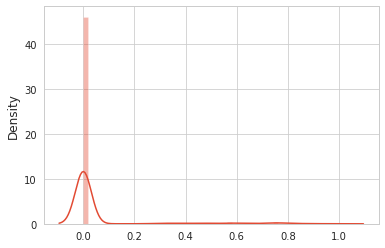

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


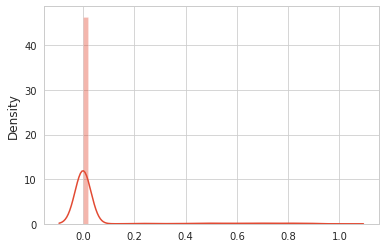

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


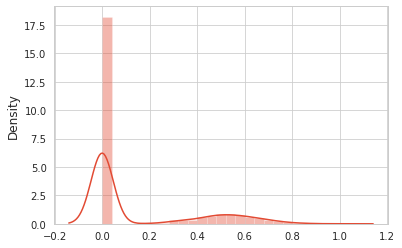

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


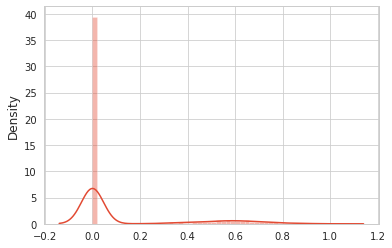

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


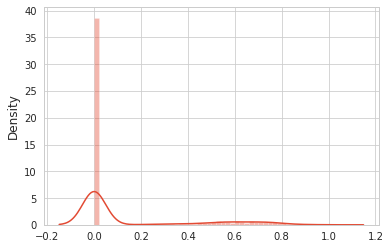

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


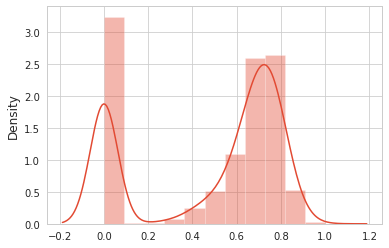

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


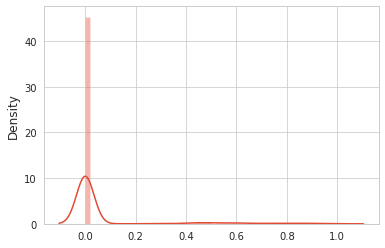

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


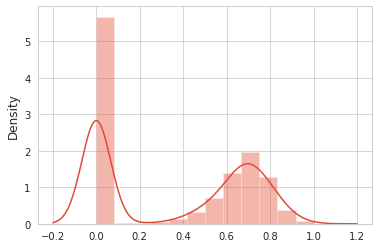

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


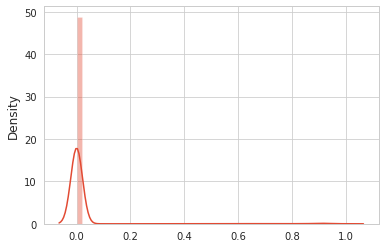

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


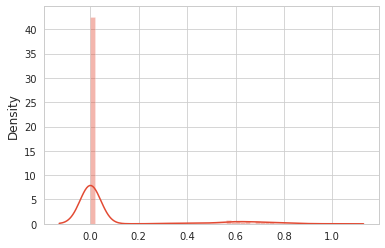

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


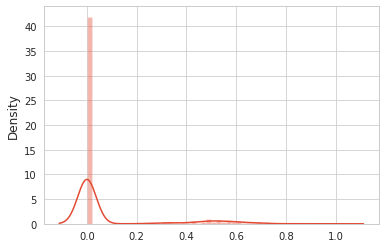

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


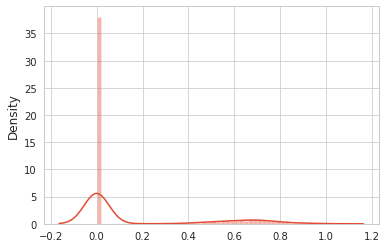

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


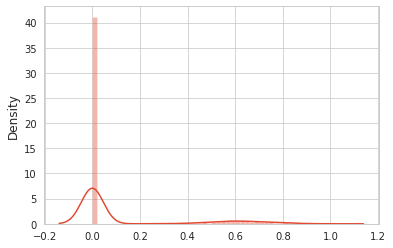

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


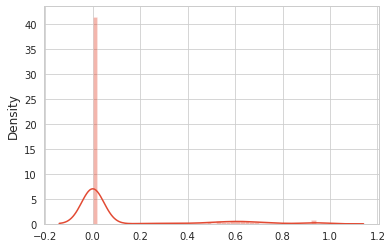

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


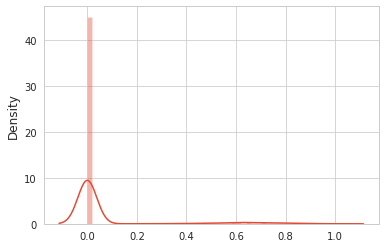

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


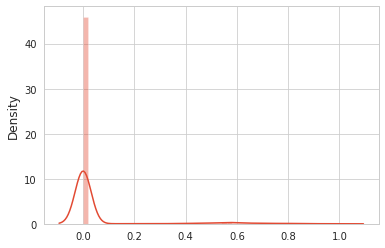

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


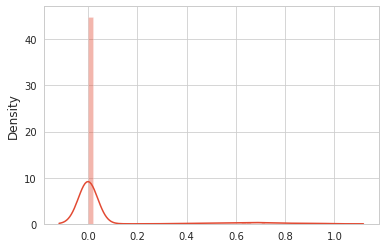

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


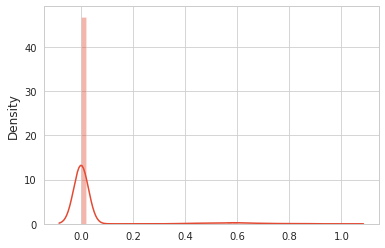

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


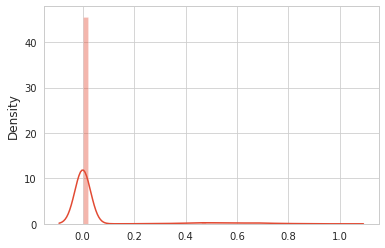

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


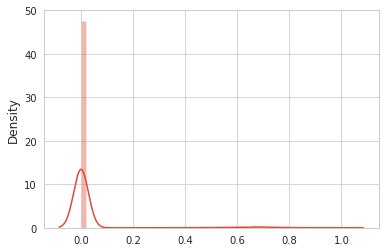

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


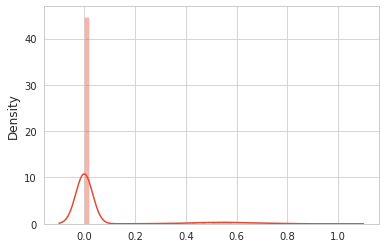

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


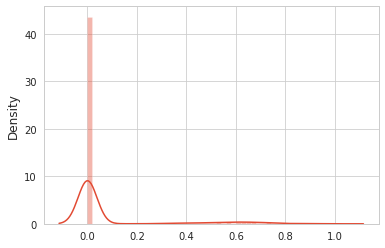

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


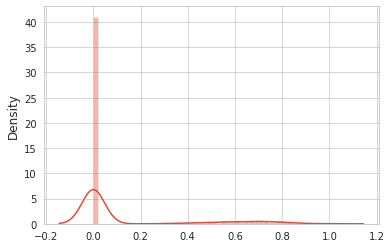

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


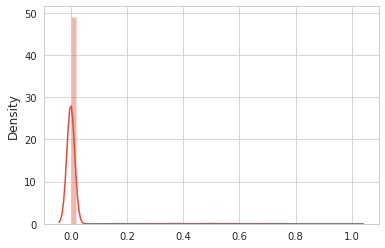

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


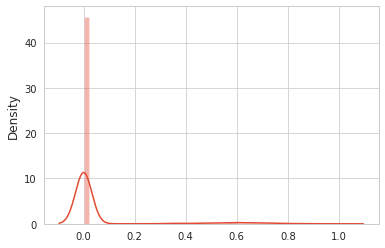

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


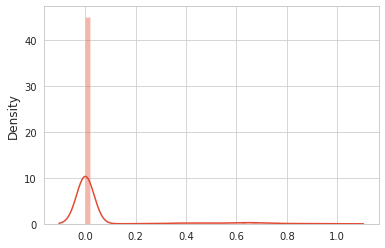

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


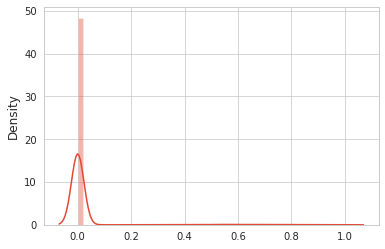

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


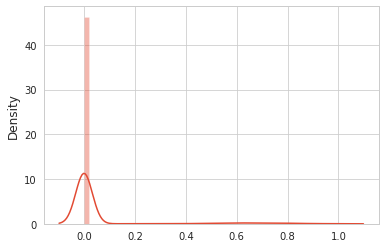

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


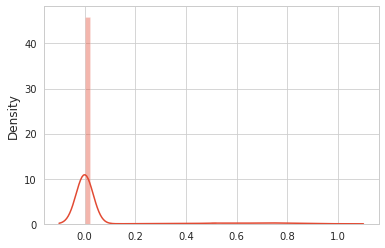

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


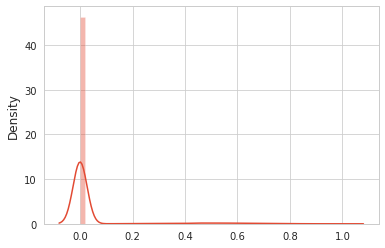

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


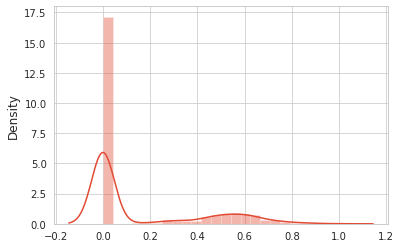

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


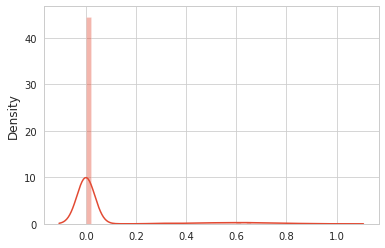

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


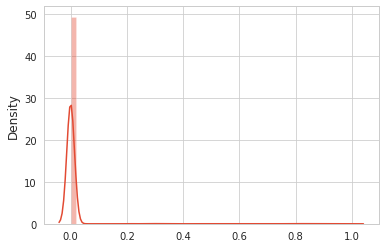

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


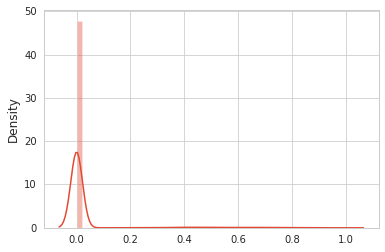

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


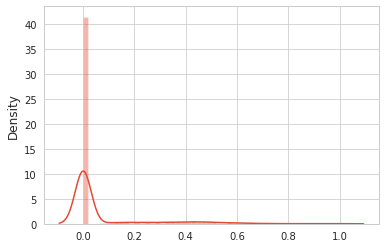

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


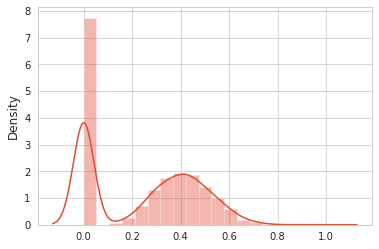

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


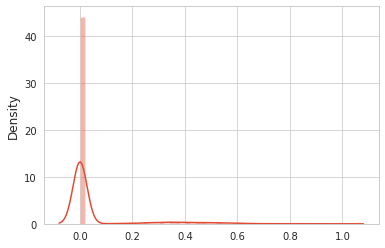

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


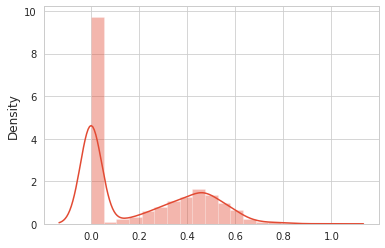

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


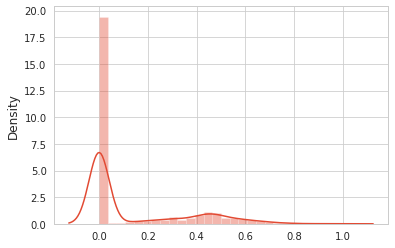

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


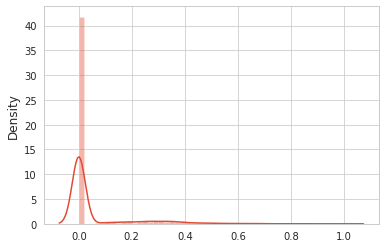

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


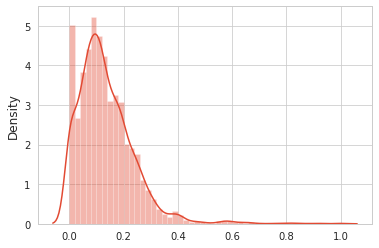

In [46]:
for i in df.columns:
  if i !='Y':
    sns.distplot(x =df[i])
    plt.show()

# Methodology

## Selecting Feature and target variables:

In [47]:
#Features selected as X
X=df.drop(['Y'],axis=1)
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55
0,0.000000,0.000000,0.992655,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.606818,0.000000,0.000000,0.025827
1,0.000000,0.556532,0.660597,0.00000,0.693832,0.687531,0.822502,0.000000,0.000000,0.53864,0.000000,0.588060,0.000000,0.000000,0.000000,0.000000,0.000000,0.608308,0.772997,0.0,0.674001,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.527128,0.000000,0.0,0.0,0.0,0.323957,0.0,0.486974,0.000000,0.293700,0.397701
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888730,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.730397,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.687103,0.000000,0.682056,0.00000,0.773156,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.707981,0.000000,0.000000,0.000000,0.640347,0.635150,0.000000,0.698943,0.0,0.792258,0.0,0.662326,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.476673,0.568453,0.000000,0.126674
4,0.671161,0.000000,0.000000,0.97748,0.598455,0.000000,0.618718,0.581350,0.000000,0.00000,0.000000,0.000000,0.000000,0.645102,0.000000,0.536419,0.620414,0.613497,0.541010,0.0,0.736363,0.0,0.000000,0.667748,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.397582,0.502394,0.000000,0.171315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.875132,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.076436
3906,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.982203,0.918405,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.098377
3907,0.422190,0.000000,0.419089,0.00000,0.000000,0.554048,0.000000,0.000000,0.000000,0.00000,0.000000,0.373071,0.515459,0.000000,0.000000,0.337431,0.000000,0.000000,0.715630,0.0,0.563344,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.495733,0.0,0.0,0.54916,0.424787,0.333156,0.0,0.0,0.0,0.338794,0.0,0.147652,0.000000,0.000000,0.031275
3908,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.819258,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.606777,0.000000,0.0,0.0,0.0,0.440892,0.0,0.375332,0.474279,0.000000,0.191916


In [48]:
#Target variable as Y
y=df['Y']
y

0       0
1       1
2       0
3       1
4       1
       ..
3905    0
3906    0
3907    0
3908    1
3909    1
Name: Y, Length: 3910, dtype: int64

In [49]:
y.value_counts()

0    2376
1    1534
Name: Y, dtype: int64

Decision Tree Classifier is used to find Feature Importance of Variables 

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=3,random_state=1)
dt_clf.fit(X, y)


DecisionTreeClassifier(max_depth=3, random_state=1)

In [52]:
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X.columns, dt_clf.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [53]:
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_df

,Feature,Importance
0,X53,0.529343
1,X7,0.246673
2,X52,0.118630
3,X25,0.071013
4,X46,0.019672
5,X27,0.014668
6,X1,0.000000
7,X2,0.000000
8,X3,0.000000
9,X4,0.000000


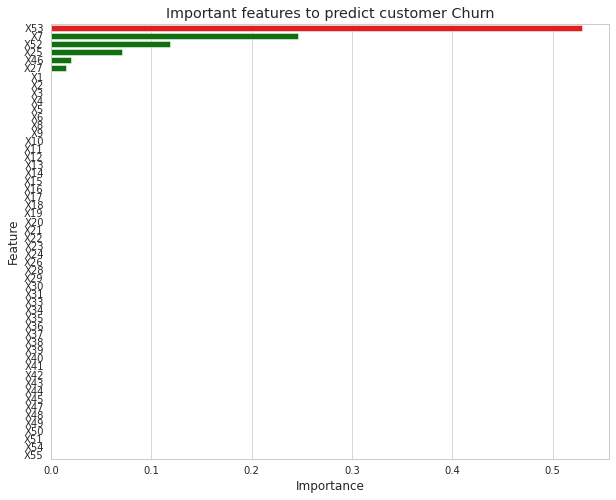

In [54]:
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
plt.show()

Extracting features only having greater than 0 magnitude of feature importance.As higher the magnitude,higher is its effect on target variables.

In [55]:
important_features=feat_df[(feat_df['Importance']>0)|(feat_df['Importance']<0)]

In [56]:
X=X[important_features['Feature'].values]
X

,X53,X7,X52,X25,X46,X27
0,0.000000,0.000000,0.606818,0.000000,0.000000,0.0
1,0.000000,0.822502,0.486974,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.568453,0.000000,0.476673,0.000000,0.000000,0.0
4,0.502394,0.618718,0.397582,0.000000,0.000000,0.0
...,...,...,...,...,...,...
3905,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3906,0.000000,0.000000,0.000000,0.982203,0.000000,0.0
3907,0.000000,0.000000,0.147652,0.000000,0.333156,0.0
3908,0.474279,0.000000,0.375332,0.000000,0.000000,0.0


# Spliting Training Dataset

In [57]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

# Decision Tree Hyper parameter Tuning:

In [58]:
param_grid = {'max_depth':np.arange(1,5),'min_samples_split':np.arange(1,10),'min_samples_leaf':np.arange(1,5)}


In [60]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
dt_cv= GridSearchCV(dt,param_grid,cv=5)
dt_cv.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [61]:
dt_cv.best_score_


0.8839606389776359

In [62]:
dt_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

# Using Best params for Decision Tree Classifier obtained above

In [63]:
dt_clf = DecisionTreeClassifier(max_depth=4,min_samples_leaf=1,min_samples_split=5,random_state=1)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=1)

In [65]:
#Predict on validation data
y_pred=dt_clf.predict(X_test)

#Compute accuracy on the training set
train_accuracy=dt_clf.score(X_train,y_train)
print("Training Accuracy: ",train_accuracy)

#Compute accuracy on the validation dataset
test_accuracy=dt_clf.score(X_test,y_test)
print("Validation Accuracy: ",test_accuracy)


Training Accuracy:  0.8951406649616368
Validation Accuracy:  0.8938618925831202


# Generate Confusion matrix and classification report:


In [66]:
#import confusion_matrix,classification_report
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[446  22]
 [ 61 253]]


Considering confusion matrix above:

True negative = 446

False positive = 22

True postive = 253

Fasle negative = 61

In [67]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.91       468
           1       0.92      0.81      0.86       314

    accuracy                           0.89       782
   macro avg       0.90      0.88      0.89       782
weighted avg       0.90      0.89      0.89       782



#Let's create a classifier using k-Nearest Neighbors algorithm.

In [68]:

from sklearn.neighbors import KNeighborsClassifier

In [69]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,20)}

In [70]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [71]:
knn_cv.best_score_


0.909525878594249

In [72]:
knn_cv.best_params_


{'n_neighbors': 5}

In [74]:
   
#Setup a knn classifier with k neighbors
knn=KNeighborsClassifier(n_neighbors=5)

#Fit the model
knn.fit(X_train,y_train)

#Predict on validation data
y_pred=knn.predict(X_test)

#Compute accuracy on the training set
train_accuracy=knn.score(X_train,y_train)
print("Training Accuracy: ",train_accuracy)


#Compute accuracy on the validation data set
test_accuracy=knn.score(X_test,y_test)
print("Validation Accuracy: ",test_accuracy)

Training Accuracy:  0.9248721227621484
Validation Accuracy:  0.9156010230179028


# Generate Confusion matrix and classification report:


In [75]:
#import confusion_matrix,classification_report
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[441  27]
 [ 39 275]]


Considering confusion matrix above:

True negative = 441

False positive = 27

True postive = 275

Fasle negative = 39

In [76]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       468
           1       0.91      0.88      0.89       314

    accuracy                           0.92       782
   macro avg       0.91      0.91      0.91       782
weighted avg       0.92      0.92      0.92       782



#Let's use Logistic Regression algorithm.

In [77]:
from sklearn.linear_model import LogisticRegression
#Create instance for LogisticRegression model
lr=LogisticRegression(max_iter=500,random_state=1)

#Fit model on training data
lr=lr.fit(X_train,y_train)

#Predict the result for validation data
y_pred=lr.predict(X_test)

#Get Accuracy for validation data 
lr.score(X_test,y_test)


0.8964194373401535

# Generate Confusion matrix and classification report:


In [78]:
#import confusion_matrix,classification_report
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[425  43]
 [ 38 276]]


Considering confusion matrix above:

True negative = 425

False positive = 43

True postive = 276

Fasle negative = 38

In [79]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.91      0.91       468
           1       0.87      0.88      0.87       314

    accuracy                           0.90       782
   macro avg       0.89      0.89      0.89       782
weighted avg       0.90      0.90      0.90       782



# Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
#Create instance for LogisticRegression model
clf = RandomForestClassifier(max_depth=3, random_state=1)

#Fit model on training data
clf=clf.fit(X_train,y_train)

#Predict the result for validation data
y_pred=clf.predict(X_test)

#Get Accuracy for validation data
clf.score(X_test,y_test)


0.8861892583120204

# Generate Confusion matrix and classification report:


In [81]:
#import confusion_matrix,classification_report
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[454  14]
 [ 75 239]]


Considering confusion matrix above:

True negative = 454

False positive = 14

True postive = 239

Fasle negative = 75

In [82]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.97      0.91       468
           1       0.94      0.76      0.84       314

    accuracy                           0.89       782
   macro avg       0.90      0.87      0.88       782
weighted avg       0.89      0.89      0.88       782



# Prediction on Test Dataset

In [83]:
test_df=pd.read_csv('/content/test_set.csv')

In [84]:
test_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [85]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  691 non-null    int64  
 1   X1          691 non-null    float64
 2   X2          691 non-null    float64
 3   X3          691 non-null    float64
 4   X4          691 non-null    float64
 5   X5          691 non-null    float64
 6   X6          691 non-null    float64
 7   X7          691 non-null    float64
 8   X8          691 non-null    float64
 9   X9          691 non-null    float64
 10  X10         691 non-null    float64
 11  X11         691 non-null    float64
 12  X12         691 non-null    float64
 13  X13         691 non-null    float64
 14  X14         691 non-null    float64
 15  X15         691 non-null    float64
 16  X16         691 non-null    float64
 17  X17         691 non-null    float64
 18  X18         691 non-null    float64
 19  X19         691 non-null    f

Log Transformation and Normalisation of Test Dataset

In [86]:
test_df_normalised_transformed = normalize(np.log(test_df + 0.01))

In [87]:
test_df_normalised_transformed.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.000000,0.696482,0.000000,0.683519,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.777589,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.745642,0.727360,0.0,0.0,0.0,0.000000,0.0,0.383699,0.000000,0.000000,0.130282,0.534821,0.422483
1,0.414214,0.000000,0.000000,0.712378,0.0,0.643047,0.000000,0.705920,0.000000,0.000000,0.000000,0.000000,0.000000,0.796752,0.000000,0.000000,0.000000,0.000000,0.000000,0.762762,0.00000,0.768158,0.0,0.000000,0.652042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.647734,0.0,0.685654,0.535177,0.000000,0.359169,0.712194,0.537142
2,0.475980,0.629079,0.472693,0.617370,0.0,0.259346,0.402129,0.284704,0.548623,0.603809,0.705438,0.614352,0.712023,0.725088,0.697706,0.000000,0.439169,0.607559,0.161242,0.795302,0.00000,0.746416,0.0,0.791164,0.529970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.165295,0.000000,0.0,0.0,0.0,0.354280,0.0,0.551673,0.882225,0.468055,0.272053,0.731512,0.816016
3,0.512222,0.391794,0.419083,0.741613,0.0,0.636070,0.688955,0.624752,0.000000,0.701182,0.391794,0.647518,0.661974,0.615857,0.000000,0.898951,0.323220,0.000000,0.692528,0.672124,0.40561,0.637566,0.0,0.697420,0.351936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.580822,0.0,0.360782,0.351936,0.0,0.0,0.0,0.436921,0.0,0.614589,0.573709,0.153654,0.329383,0.904622,0.725625
4,0.537967,0.000000,0.000000,0.687974,0.0,0.621018,0.000000,0.681737,0.000000,0.000000,0.000000,0.000000,0.000000,0.769458,0.000000,0.000000,0.000000,0.000000,0.000000,0.686000,0.00000,0.745395,0.0,0.000000,0.629705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.636798,0.0,0.675967,0.523124,0.000000,0.314875,0.481302,0.537142


Selecting only features having higher feature Importance values from above analysis done

In [88]:
test_df_normalised_transformed=test_df_normalised_transformed[['X53','X7','X52','X25','X46','X27']]

In [89]:
#Predict on test data
y_prediction=dt_clf.predict(test_df_normalised_transformed)



In [90]:
y_prediction=pd.DataFrame(y_prediction)
y_prediction

,0
0,0
1,1
2,1
3,1
4,1
...,...
686,0
687,1
688,0
689,0


In [91]:
test_df_pred=pd.concat([test_df, y_prediction], axis=1)

In [92]:
test_df.to_csv('Test_set_with_Prediction.csv',index=False)